## CONNECTION AVEC NOTRE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## SPECIFICATION DE CHEMIN

In [ ]:
dataset_dir = '/content/drive/MyDrive/Dataset_projet2'


In [ ]:
import torch
print("GPU disponible :", torch.cuda.is_available())
print("Nom du GPU :", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Aucun GPU détecté")


GPU disponible : False
Nom du GPU : Aucun GPU détecté


## PREPARATION DE L'ENVIRONNEMENT

---



In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

print("YOLO installé avec succès !")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO installé avec succès !


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git


Cloning into 'ultralytics'...
remote: Enumerating objects: 51643, done.
remote: Counting objects: 100% (743/743), done.
remote: Compressing objects: 100% (500/500), done.
remote: Total 51643 (delta 516), reused 263 (delta 243), pack-reused 50900 (from 4)
Receiving objects: 100% (51643/51643), 30.10 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (37876/37876), done.


In [ ]:
!pip install ultralytics torch torchvision opencv-python numpy matplotlib tqdm pandas seaborn


In [ ]:
from ultralytics import YOLO

# Charger un modèle YOLOv10 pré-entraîné
model = YOLO("yolov10n.pt")

# Afficher les détails du modèle
model.info()


100%|██████████| 5.59M/5.59M [00:00<00:00, 64.7MB/s]


YOLOv10n summary: 223 layers, 2,775,520 parameters, 0 gradients, 8.7 GFLOPs


(223, 2775520, 0, 8.7404288)

##CHARGEMENT ET DECOMPRESSION DE LA DATASET

In [ ]:
!unzip Dataset_projet2.zip -d /content/drive/MyDrive/Dataset_projet2



Archive:  Dataset_projet2.zip
   creating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/
  inflating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/data.yaml  
   creating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/
   creating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/images/
  inflating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/images/sign19_jpg.rf.c43d5be4f43754e129448e5ffa573c6b.jpg  
  inflating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/images/sign28_jpg.rf.51c6dc59e964f46f1f3f3fc0d87c13c6.jpg  
  inflating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/images/sign42_jpg.rf.cdc4961fe96899f9f14e5d4031135c18.jpg  
  inflating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/images/sign58_jpg.rf.2043b187a5ef90d1d99c3bcbf7aa03bf.jpg  
  inflating: /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/test/images/sign6_jpg.rf.0cc70894c13a8d04056301763dc0b968.jpg  
  

In [ ]:
!ls /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train


images	labels


In [ ]:
!ls /content/drive/MyDrive/Dataset_projet2/Dataset_projet2/valid


images	labels


# Vérification la structure du dossier dataset

In [ ]:
import os

# Vérifier la structure du dossier dataset
dataset_dir = '/content/drive/MyDrive/Dataset_projet/Dataset_projet'

train_images = len(os.listdir(os.path.join(dataset_dir, 'train', 'images')))
train_labels = len(os.listdir(os.path.join(dataset_dir, 'train', 'labels')))
val_images = len(os.listdir(os.path.join(dataset_dir, 'valid', 'images')))
val_labels = len(os.listdir(os.path.join(dataset_dir, 'valid', 'labels')))

print(f"Train Images: {train_images}, Train Labels: {train_labels}")
print(f"Val Images: {val_images}, Val Labels: {val_labels}")


Train Images: 1314, Train Labels: 1314
Val Images: 39, Val Labels: 39


## Vérification de la taille des images

In [ ]:
from PIL import Image


def check_image_size(image_dir):
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        with Image.open(image_path) as img:
            if img.size != (640, 640):  # Modifier si nécessaire
                print(f"Image {image_name} taille incorrecte : {img.size}")
    print("TOUTES LES IMAGES SONT BIEN EN 640*640")
    print("Vérification terminée.")

check_image_size("/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/images")


TOUTES LES IMAGES SONT BIEN EN 640*640
Vérification terminée.


## VERIFICATION ANNOTATION YAML

In [ ]:
import os

def check_annotations(label_dir):
    for label_name in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_name)

        # Vérifier si c'est un fichier (et pas un dossier)
        if os.path.isfile(label_path) and label_path.endswith('.txt'):
            with open(label_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        print(f"Annotation incorrecte dans {label_name}")
    print("Vérification terminée toutes les annotations sont bien en format YOLO.")

# Vérification des annotations dans le dossier des labels
check_annotations("/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/labels")









Vérification terminée toutes les annotations sont bien en format YOLO.


##VERIFICATION QUE TOUTES LES IMAGES ONT LEUR ANNOTATION

In [ ]:
import os

def check_annotations_for_images(image_dir, label_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]  # Liste des images .jpg
    missing_annotations = []  # Liste des images sans annotation

    for image_file in image_files:
        label_file = image_file.replace('.jpg', '.txt')  # Trouver le fichier d'annotation correspondant

        # Vérifier si le fichier d'annotation existe
        label_path = os.path.join(label_dir, label_file)
        if not os.path.isfile(label_path):
            missing_annotations.append(image_file)  # Ajouter l'image à la liste si l'annotation manque

    if missing_annotations:
        print(f"Les images suivantes n'ont pas d'annotations correspondantes :")
        for image in missing_annotations:
            print(image)
    else:
        print("Toutes les images ont leurs annotations correspondantes.")

# Appel de la fonction pour vérifier les annotations
check_annotations_for_images('/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/images', '/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/labels')


Toutes les images ont leurs annotations correspondantes.


## AFFICHAGE DES IMAGES ET LEUR BOUNDING BOX

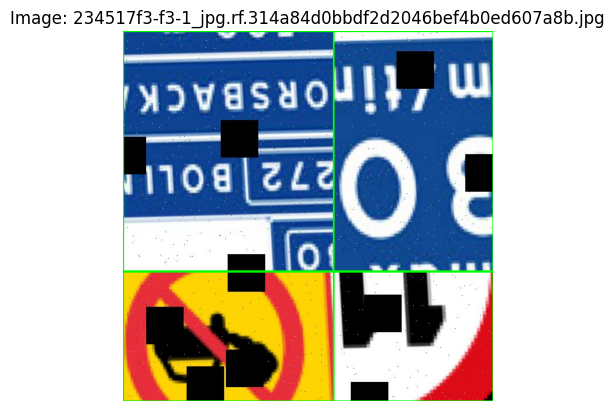

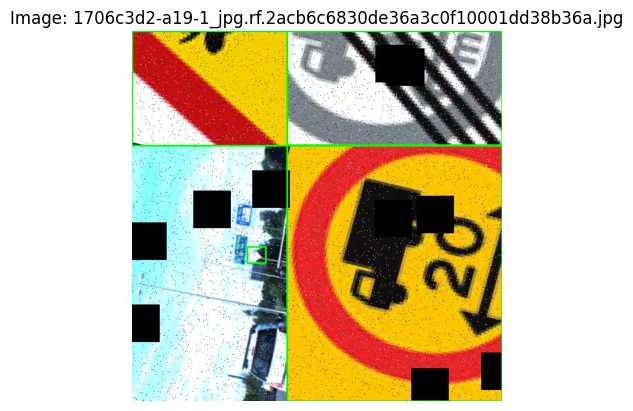

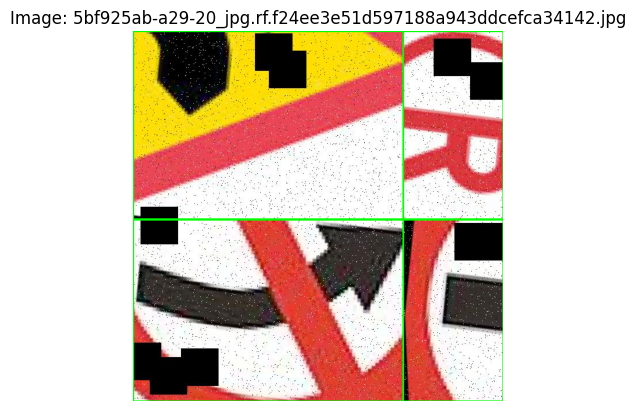

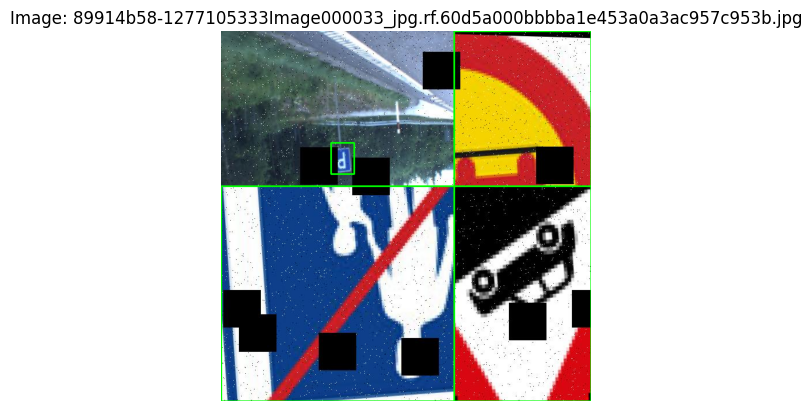

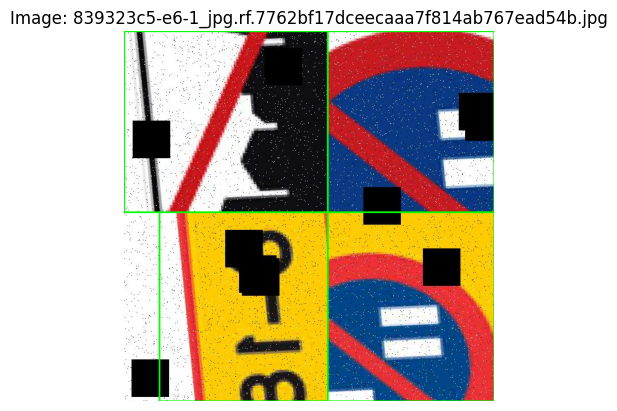

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def show_image_with_annotations(image_path, label_path, image_name):
    img = cv2.imread(image_path)
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])  # Classe de l'objet (non utilisé ici mais utile)
            x_center, y_center, width, height = map(float, parts[1:])
            # Convertir les coordonnées normalisées en pixels
            h, w, _ = img.shape
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Dessiner la boîte englobante

    # Afficher le nom de l'image en haut de l'image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_name}")  # Afficher le nom de l'image
    plt.axis('off')  # Masquer les axes
    plt.show()

# Répertoire contenant les images et labels
image_dir = '/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/images'
label_dir = '/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/labels'

# Obtenir une liste de tous les fichiers d'image
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Afficher 5 images avec annotations
for i in range(5):
    image_file = random.choice(image_files)  # Choisir une image aléatoire
    label_file = image_file.replace('.jpg', '.txt')  # Trouver le fichier d'annotation correspondant

    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, label_file)

    show_image_with_annotations(image_path, label_path, image_file)


##DISTRIBUTION DES CLASSE

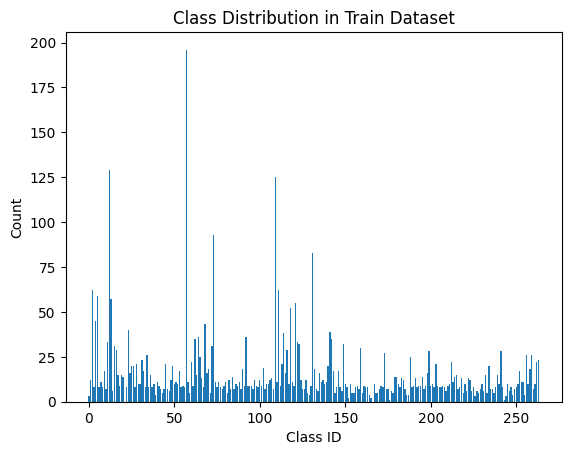

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Récupérer les classes à partir des annotations
def get_class_distribution(label_dir):
    class_counter = Counter()
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    class_counter[class_id] += 1
    return class_counter

class_distribution = get_class_distribution("/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/labels")
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Class Distribution in Train Dataset')
plt.show()


In [ ]:
from collections import Counter
import os

# Récupérer les classes à partir des annotations
def get_class_distribution(label_dir):
    class_counter = Counter()
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    class_counter[class_id] += 1
    return class_counter

class_distribution = get_class_distribution("/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels")

# Affichage de la distribution des classes sous forme de texte
print("Distribution des classes dans le dataset d'entraînement :")
for class_id, count in sorted(class_distribution.items()):
    print(f"Classe {class_id}: {count} occurrences")


Distribution des classes dans le dataset d'entraînement :
Classe 0: 3 occurrences
Classe 1: 12 occurrences
Classe 2: 62 occurrences
Classe 3: 8 occurrences
Classe 4: 45 occurrences
Classe 5: 59 occurrences
Classe 6: 8 occurrences
Classe 7: 11 occurrences
Classe 8: 8 occurrences
Classe 9: 17 occurrences
Classe 10: 7 occurrences
Classe 11: 33 occurrences
Classe 12: 129 occurrences
Classe 13: 57 occurrences
Classe 14: 6 occurrences
Classe 15: 31 occurrences
Classe 16: 29 occurrences
Classe 17: 15 occurrences
Classe 18: 9 occurrences
Classe 19: 15 occurrences
Classe 20: 14 occurrences
Classe 22: 8 occurrences
Classe 23: 40 occurrences
Classe 24: 16 occurrences
Classe 25: 20 occurrences
Classe 26: 20 occurrences
Classe 27: 8 occurrences
Classe 28: 21 occurrences
Classe 29: 10 occurrences
Classe 30: 10 occurrences
Classe 31: 23 occurrences
Classe 32: 17 occurrences
Classe 33: 8 occurrences
Classe 34: 26 occurrences
Classe 35: 8 occurrences
Classe 36: 15 occurrences
Classe 37: 8 occurrences
C

In [ ]:
# Afficher les classes rares < 10 occurence
rare_classes = {class_id: count for class_id, count in class_distribution.items() if count <= 10}
print("Classes rares (avec moins de 6 occurrences) :")
for class_id, count in sorted(rare_classes.items()):
    print(f"Classe {class_id}: {count} occurrences")


Classes rares (avec moins de 6 occurrences) :
Classe 0: 3 occurrences
Classe 3: 8 occurrences
Classe 6: 8 occurrences
Classe 8: 8 occurrences
Classe 10: 7 occurrences
Classe 14: 6 occurrences
Classe 18: 9 occurrences
Classe 22: 8 occurrences
Classe 27: 8 occurrences
Classe 29: 10 occurrences
Classe 30: 10 occurrences
Classe 33: 8 occurrences
Classe 35: 8 occurrences
Classe 37: 8 occurrences
Classe 38: 10 occurrences
Classe 39: 4 occurrences
Classe 41: 9 occurrences
Classe 42: 7 occurrences
Classe 43: 5 occurrences
Classe 44: 7 occurrences
Classe 46: 7 occurrences
Classe 47: 6 occurrences
Classe 50: 10 occurrences
Classe 52: 10 occurrences
Classe 54: 8 occurrences
Classe 55: 9 occurrences
Classe 56: 8 occurrences
Classe 59: 5 occurrences
Classe 61: 9 occurrences
Classe 67: 8 occurrences
Classe 71: 5 occurrences
Classe 75: 8 occurrences
Classe 77: 8 occurrences
Classe 78: 7 occurrences
Classe 79: 9 occurrences
Classe 81: 5 occurrences
Classe 83: 7 occurrences
Classe 85: 7 occurrences
Cla

In [ ]:
# Afficher les classes rares > 100 occurence
rare_classes = {class_id: count for class_id, count in class_distribution.items() if count >= 100}
print("Classes rares (avec moins de 6 occurrences) :")
for class_id, count in sorted(rare_classes.items()):
    print(f"Classe {class_id}: {count} occurrences")

Classes rares (avec moins de 6 occurrences) :
Classe 12: 129 occurrences
Classe 57: 196 occurrences
Classe 109: 125 occurrences


In [ ]:
##IMAGE/CLASS DETECTION

RECUPERATION LE NOM DES IMAGES D'UNE CLASSE SPECIFIE

In [ ]:
import os

def get_images_by_class(label_dir, target_class):
    image_names = []
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    if class_id == target_class:
                        # Ajouter le nom de l'image (sans l'extension .txt)
                        image_name = label_name.replace('.txt', '.jpg')  # Assurez-vous que l'extension de l'image est correcte
                        image_names.append(image_name)
                        break  # Si la classe est trouvée, on passe à l'image suivante
    return image_names

# Récupérer les noms des images pour la classe 57
image_names_class_1 = get_images_by_class('/content/drive/MyDrive/Dataset_projet/Dataset_projet/train/labels',57)

# Afficher les résultats
print("Images correspondant à la classe specifie:")
for image_name in image_names_class_1:
    print(image_name)

Images correspondant à la classe specifie:
3cadb2dd-c41-6_jpg.rf.887c7c0841071d064fe70dcb46e084ad.jpg
4955387c-a29-13_jpg.rf.eab0923146b743c7dd2cf3478db853bb.jpg
4ffc9e32-1277383292Image000083_jpg.rf.b166381f9eccb3b8412497147af72bad.jpg
49d461c6-e20-3_jpg.rf.92dc5ec61784ead3066eba3c43aa9b0b.jpg
4b3423f9-a29-15_jpg.rf.8b6679d24749753f953049552066f44e.jpg
4955387c-a29-13_jpg.rf.7d4641427581d39a40a434877fc76e4d.jpg
4b3423f9-a29-15_jpg.rf.bedb21727a23b61a77071690e3a76bde.jpg
4f68da42-1277106518Image000028_jpg.rf.29fc37998b75c448a0318f91c733f0a8.jpg
4b3423f9-a29-15_jpg.rf.73bc0466fd0b6e384d49ec6726e04ae1.jpg
4955387c-a29-13_jpg.rf.c44b405515065e40225d0bcdc5fe2bc8.jpg
523454aa-1277106114Image000036_jpg.rf.27b92b916ab142fac5ed549a21d25994.jpg
523454aa-1277106114Image000036_jpg.rf.e10359b96928b87f50b9f7bf3dd120e2.jpg
53454a40-a22-1_jpg.rf.28a9b69fbd30b5bd43b508bb635ce77a.jpg
523454aa-1277106114Image000036_jpg.rf.f02d31c12a0d8974f8e5255a9c1cd78f.jpg
555d8956-f28-1_jpg.rf.e52e65b79a20c1d0201df98

##AUGMENTATION DE LA DATASET

In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
import time

# 📌 Chemins de base
dataset_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2'
train_images_dir = os.path.join(dataset_dir, 'train', 'images')
train_labels_dir = os.path.join(dataset_dir, 'train', 'labels')

output_dir = '/content/drive/MyDrive/Dataset_projet2/Output'

# 📌 Créer le dossier de sortie si nécessaire
os.makedirs(output_dir, exist_ok=True)

# 📌 Fonction pour sauvegarder l'image et son annotation avec un nom unique
def save_augmented_image(image, annotations, name):
    img_path = os.path.join(output_dir, f"{name}.jpg")
    label_path = os.path.join(output_dir, f"{name}.txt")

    # Sauvegarder l'image
    cv2.imwrite(img_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    # Sauvegarder l'annotation (YOLO format)
    with open(label_path, "w") as f:
        f.writelines(annotations)

# 📌 Fonction pour charger une image et son annotation
def load_image_and_annotation(image_name):
    image_path = os.path.join(train_images_dir, image_name)
    label_path = os.path.join(train_labels_dir, image_name.replace('.jpg', '.txt'))

    # Charger l'image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB

    # Charger l'annotation YOLO (format : class x_center y_center width height)
    with open(label_path, "r") as f:
        annotations = f.readlines()

    return image, annotations

# 📌 Appliquer l'augmentation et ajuster les annotations
def apply_augmentation(transform, image, annotations, prefix):
    # Utiliser un timestamp ou un compteur pour garantir un nom unique
    timestamp = str(int(time.time()))  # Générer un timestamp unique
    for i in range(4):  # 🔄 Générer 4 variations
        augmented = transform(image=image)
        aug_image = augmented['image']
        # Sauvegarder avec un suffixe unique basé sur le timestamp
        save_augmented_image(aug_image, annotations, f"{prefix}_{timestamp}_{i+1}")

# 📌 Définir les augmentations sûres
augmentations = {
    "translation": A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0, rotate_limit=0, p=1),
    "rotation": A.ShiftScaleRotate(shift_limit=0, scale_limit=0, rotate_limit=10, p=1),
    "scaling": A.ShiftScaleRotate(shift_limit=0, scale_limit=0.1, rotate_limit=0, p=1),
    "gaussian_noise": A.GaussNoise(var_limit=(10, 50), p=1),
    "motion_blur": A.MotionBlur(blur_limit=5, p=1),
    "brightness_contrast": A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1),
    "shadow": A.RandomShadow(p=1)
}

# 📌 Sélectionner une image du dossier pour augmenter
image_name = "0216206a-c7-1_jpg.rf.bb2b1423ea3a10519210629ad35b171a.jpg"  # Remplace par l'image que tu veux augmenter

# 📌 Charger l'image et ses annotations
image, annotations = load_image_and_annotation(image_name)

# 📌 Appliquer chaque augmentation et sauvegarder
for aug_name, aug in augmentations.items():
    apply_augmentation(aug, image, annotations, aug_name)

print("✅ Augmentations terminées ! Images enregistrées dans 'output/' 🎉")


<ipython-input-432-70787cb5e657>:59: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  "gaussian_noise": A.GaussNoise(var_limit=(10, 50), p=1),


✅ Augmentations terminées ! Images enregistrées dans 'output/' 🎉


In [ ]:
import os
import shutil

def split_files_by_extension(source_folder):
    # Définition des dossiers de destination
    jpg_folder = os.path.join(source_folder, "jpg_files")
    txt_folder = os.path.join(source_folder, "txt_files")

    # Création des dossiers s'ils n'existent pas
    os.makedirs(jpg_folder, exist_ok=True)
    os.makedirs(txt_folder, exist_ok=True)

    # Parcourir tous les fichiers du dossier source
    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)

        # Vérifier si c'est un fichier (et non un dossier)
        if os.path.isfile(file_path):
            if filename.lower().endswith(".jpg"):  # Fichiers JPG
                shutil.move(file_path, os.path.join(jpg_folder, filename))
            elif filename.lower().endswith(".txt"):  # Fichiers TXT
                shutil.move(file_path, os.path.join(txt_folder, filename))

    print("Fichiers triés avec succès !")

# Exemple d'utilisation
source_directory = "/content/drive/MyDrive/Dataset_projet2/Output"  # Remplace par le bon chemin
split_files_by_extension(source_directory)


Fichiers triés avec succès !


In [ ]:
import os
import shutil

def copy_files(source_folder, destination_folder):
    # Vérifier si le dossier source existe
    if not os.path.exists(source_folder):
        print("❌ Le dossier source n'existe pas.")
        return

    # Créer le dossier de destination s'il n'existe pas
    os.makedirs(destination_folder, exist_ok=True)

    # Copier tous les fichiers du dossier source vers le dossier destination
    for file in os.listdir(source_folder):
        file_path = os.path.join(source_folder, file)

        if os.path.isfile(file_path):  # Vérifie que c'est bien un fichier
            shutil.copy(file_path, os.path.join(destination_folder, file))

    print("✅ Copie des fichiers terminée !")

# Utilisation
source_directory = "/content/drive/MyDrive/Dataset_projet2/Output/txt_files"  # Remplace par ton chemin
destination_directory = "/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels"  # Remplace par ton chemin

copy_files(source_directory, destination_directory)


✅ Copie des fichiers terminée !


In [ ]:
from collections import Counter
import os

# Récupérer les classes à partir des annotations
def get_class_distribution(label_dir):
    class_counter = Counter()
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    class_counter[class_id] += 1
    return class_counter

class_distribution = get_class_distribution("/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels")

# Affichage de la distribution des classes sous forme de texte
print("Distribution des classes dans le dataset d'entraînement :")
for class_id, count in sorted(class_distribution.items()):
    print(f"Classe {class_id}: {count} occurrences")


Distribution des classes dans le dataset d'entraînement :
Classe 0: 30 occurrences
Classe 1: 35 occurrences
Classe 2: 159 occurrences
Classe 3: 41 occurrences
Classe 4: 160 occurrences
Classe 5: 175 occurrences
Classe 6: 36 occurrences
Classe 7: 41 occurrences
Classe 8: 34 occurrences
Classe 9: 71 occurrences
Classe 10: 35 occurrences
Classe 11: 131 occurrences
Classe 12: 193 occurrences
Classe 13: 197 occurrences
Classe 14: 30 occurrences
Classe 15: 150 occurrences
Classe 16: 162 occurrences
Classe 17: 108 occurrences
Classe 18: 47 occurrences
Classe 19: 71 occurrences
Classe 20: 42 occurrences
Classe 22: 34 occurrences
Classe 23: 176 occurrences
Classe 24: 49 occurrences
Classe 25: 116 occurrences
Classe 26: 52 occurrences
Classe 27: 45 occurrences
Classe 28: 114 occurrences
Classe 29: 63 occurrences
Classe 30: 38 occurrences
Classe 31: 88 occurrences
Classe 32: 82 occurrences
Classe 33: 36 occurrences
Classe 34: 86 occurrences
Classe 35: 35 occurrences
Classe 36: 74 occurrences
Clas

In [ ]:
import yaml

def check_class_names(yaml_file, label_dir):
    with open(yaml_file, 'r') as file:
        class_names = yaml.safe_load(file)['names']

    # Créer un dictionnaire pour la correspondance des classes
    class_check = {}

    # Analyser les classes dans le dossier d'annotations
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    # Vérifier si la classe existe dans le fichier YAML
                    if class_id < len(class_names):
                        class_check[class_id] = class_names[class_id]
                    else:
                        print(f"Classe {class_id} non définie dans le fichier YAML")

    # Afficher les résultats
    return class_check

# Remplacer par le chemin du fichier YAML et des annotations
yaml_file = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/data.yaml'
label_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels'

class_check = check_class_names(yaml_file, label_dir)

# Afficher la correspondance des classes
for class_id, class_name in class_check.items():
    print(f"Classe {class_id}: {class_name}")


Classe 75: 2
Classe 13: 112
Classe 60: 169
Classe 92: 4
Classe 69: 178
Classe 232: Turn left or straight ahead
Classe 57: 166
Classe 161: End of lane reserved for public transport
Classe 145: 98
Classe 73: 181
Classe 245: length limit-10m
Classe 220: Steep downhill
Classe 160: End of all restrictions
Classe 131: 82
Classe 2: 100
Classe 93: 40
Classe 42: 147
Classe 101: 49
Classe 132: 83
Classe 252: speed limit-100
Classe 199: One-way traffic
Classe 148: Axle weight limit-2ton
Classe 26: 128
Classe 68: 177
Classe 159: Direction to be followed
Classe 15: 115
Classe 4: 102
Classe 149: Bus stop
Classe 49: 155
Classe 98: 46
Classe 5: 103
Classe 114: 62
Classe 234: Uneven road
Classe 241: end of the speed limit
Classe 65: 173
Classe 263: warning wild animal
Classe 1: 1
Classe 246: lowspeed zone
Classe 215: Slippery road
Classe 118: 66
Classe 22: 123
Classe 90: 36
Classe 76: 20
Classe 242: exit
Classe 123: 71
Classe 79: 23
Classe 12: 111
Classe 141: 93
Classe 119: 67
Classe 222: Stop
Classe 4

## REDUIRE LE NOMBRE D'OCCURENCE DES CLASSE QUI DEPASSE 200 (ABBERANTES HAUTES)

In [ ]:
import os
import random

def get_images_by_class(label_dir):
    class_images = {}
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    image_name = label_name.replace('.txt', '.jpg')
                    if class_id not in class_images:
                        class_images[class_id] = []
                    class_images[class_id].append(image_name)
    return class_images

def remove_excess_images(label_dir, image_dir, max_per_class=200):
    class_images = get_images_by_class(label_dir)

    for class_id, images in class_images.items():
        if len(images) > max_per_class:
            images_to_remove = random.sample(images, len(images) - max_per_class)
            for image_name in images_to_remove:
                image_path = os.path.join(image_dir, image_name)
                label_path = os.path.join(label_dir, image_name.replace('.jpg', '.txt'))

                if os.path.exists(image_path):
                    os.remove(image_path)
                if os.path.exists(label_path):
                    os.remove(label_path)

                print(f"Removed: {image_name} and its annotation")

# Paramètres
label_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels'
image_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/images'
max_per_class = 170  # Vous pouvez changer à 180 ou 170

remove_excess_images(label_dir, image_dir, max_per_class)


Removed: translation_1741731764_3.jpg and its annotation
Removed: rotation_1741733202_3.jpg and its annotation
Removed: rotation_1741731846_3.jpg and its annotation
Removed: gaussian_noise_1741731847_1.jpg and its annotation
Removed: 1fd2cee4-a7-1_jpg.rf.a30913c8944131adc2f77784c0f61b9e.jpg and its annotation
Removed: shadow_1741730424_2.jpg and its annotation
Removed: shadow_1741731766_3.jpg and its annotation
Removed: motion_blur_1741731765_2.jpg and its annotation
Removed: shadow_1741731766_4.jpg and its annotation
Removed: scaling_1741730423_3.jpg and its annotation
Removed: b5c24d3d-e12-1_jpg.rf.1ddee38f5d8440e3128547ab0570d0d1.jpg and its annotation
Removed: gaussian_noise_1741732384_4.jpg and its annotation
Removed: motion_blur_1741731765_4.jpg and its annotation
Removed: shadow_1741732384_4.jpg and its annotation
Removed: scaling_1741733202_1.jpg and its annotation
Removed: brightness_contrast_1741733203_2.jpg and its annotation
Removed: motion_blur_1741731765_3.jpg and its ann

## AUGMENTATION DES CLASSE AVEC OCCURENCE < 5 (ABBERANTE BASSES)

In [ ]:
import os
import random
import cv2
import albumentations as A

# Fonction pour récupérer les images par classe
def get_images_by_class(label_dir):
    class_images = {}
    for label_name in os.listdir(label_dir):
        if label_name.endswith('.txt'):
            with open(os.path.join(label_dir, label_name), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    image_name = label_name.replace('.txt', '.jpg')
                    if class_id not in class_images:
                        class_images[class_id] = []
                    class_images[class_id].append(image_name)
    return class_images

# Fonction d'augmentation dans les mêmes dossiers
def augment_images_in_place(label_dir, image_dir, min_occurrences=30):
    # Récupère les images par classe
    class_images = get_images_by_class(label_dir)

    # Définir les transformations "sûres" pour les panneaux routiers
    transform = A.Compose([
        A.OneOf([
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0),
            A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=20, p=1.0),
        ], p=0.7),
        A.Rotate(limit=5, p=0.5),  # Rotation légère
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0, rotate_limit=0, p=0.5),  # Translation légère
        A.GaussNoise(var_limit=(10.0, 20.0), p=0.3),  # Bruit léger
        A.Blur(blur_limit=3, p=0.3),  # Flou léger
    ])

    # Parcourir chaque classe
    for class_id, images in class_images.items():
        current_count = len(images)
        print(f"Classe {class_id}: {current_count} occurrences initiales")

        # Si la classe a moins de 15 occurrences, augmenter jusqu'à 30
        if current_count < 15:
            images_needed = min_occurrences - current_count
            print(f"Augmenting Classe {class_id} : besoin de {images_needed} nouvelles images")

            # Générer des images augmentées
            i = 0
            while i < images_needed:
                # Choisir une image aléatoire parmi les originales
                base_image_name = random.choice(images)
                base_image_path = os.path.join(image_dir, base_image_name)
                base_label_path = os.path.join(label_dir, base_image_name.replace('.jpg', '.txt'))

                if os.path.exists(base_image_path):
                    # Charger l'image
                    image = cv2.imread(base_image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour albumentations

                    # Appliquer l'augmentation
                    augmented = transform(image=image)
                    aug_image = augmented['image']

                    # Nouveau nom pour l'image augmentée
                    new_image_name = f"aug_{class_id}_{i}_{base_image_name}"
                    new_image_path = os.path.join(image_dir, new_image_name)
                    new_label_path = os.path.join(label_dir, new_image_name.replace('.jpg', '.txt'))

                    # Sauvegarder l'image augmentée dans le même dossier
                    cv2.imwrite(new_image_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
                    # Copier l'annotation dans le même dossier (pas de modification des coordonnées)
                    with open(base_label_path, 'r') as src_label:
                        with open(new_label_path, 'w') as dst_label:
                            dst_label.write(src_label.read())

                    print(f"Generated and added: {new_image_name} in {image_dir}")
                    i += 1

        else:
            print(f"Classe {class_id} : déjà {current_count} occurrences, pas d'augmentation nécessaire")

# Paramètres
label_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels'
image_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/images'
min_occurrences = 30

# Exécuter l'augmentation dans les mêmes dossiers
augment_images_in_place(label_dir, image_dir, min_occurrences)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-17-fd1746265fb7>:34: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 20.0), p=0.3),  # Bruit léger


Classe 68: 154 occurrences initiales
Classe 68 : déjà 154 occurrences, pas d'augmentation nécessaire
Classe 74: 37 occurrences initiales
Classe 74 : déjà 37 occurrences, pas d'augmentation nécessaire
Classe 259: 113 occurrences initiales
Classe 259 : déjà 113 occurrences, pas d'augmentation nécessaire
Classe 76: 36 occurrences initiales
Classe 76 : déjà 36 occurrences, pas d'augmentation nécessaire
Classe 118: 116 occurrences initiales
Classe 118 : déjà 116 occurrences, pas d'augmentation nécessaire
Classe 97: 33 occurrences initiales
Classe 97 : déjà 33 occurrences, pas d'augmentation nécessaire
Classe 130: 36 occurrences initiales
Classe 130 : déjà 36 occurrences, pas d'augmentation nécessaire
Classe 5: 153 occurrences initiales
Classe 5 : déjà 153 occurrences, pas d'augmentation nécessaire
Classe 4: 160 occurrences initiales
Classe 4 : déjà 160 occurrences, pas d'augmentation nécessaire
Classe 3: 35 occurrences initiales
Classe 3 : déjà 35 occurrences, pas d'augmentation nécessaire


In [ ]:
import os
import shutil
import random

def split_dataset(image_dir, label_dir, output_dir, train_ratio=0.8):
    os.makedirs(os.path.join(output_dir, 'train', 'images_2'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'train', 'labels_2'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', 'labels'), exist_ok=True)

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    random.shuffle(image_files)

    split_idx = int(len(image_files) * train_ratio)
    train_files = image_files[:split_idx]
    val_files = image_files[split_idx:]

    for file in train_files:
        shutil.move(os.path.join(image_dir, file), os.path.join(output_dir, 'train', 'images_2', file))
        label_file = file.replace('.jpg', '.txt')
        if os.path.exists(os.path.join(label_dir, label_file)):
            shutil.move(os.path.join(label_dir, label_file), os.path.join(output_dir, 'train', 'labels_2', label_file))

    for file in val_files:
        shutil.move(os.path.join(image_dir, file), os.path.join(output_dir, 'val', 'images', file))
        label_file = file.replace('.jpg', '.txt')
        if os.path.exists(os.path.join(label_dir, label_file)):
            shutil.move(os.path.join(label_dir, label_file), os.path.join(output_dir, 'val', 'labels', label_file))

    print("Dataset successfully split!")

# Paramètres
image_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/images'
label_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels'
output_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2'
train_ratio = 0.8  # 80% train, 20% validation

split_dataset(image_dir, label_dir, output_dir, train_ratio)


Dataset successfully split!


##LA NOUVELLE DISTRIBUTION DE NOTRE DATASET

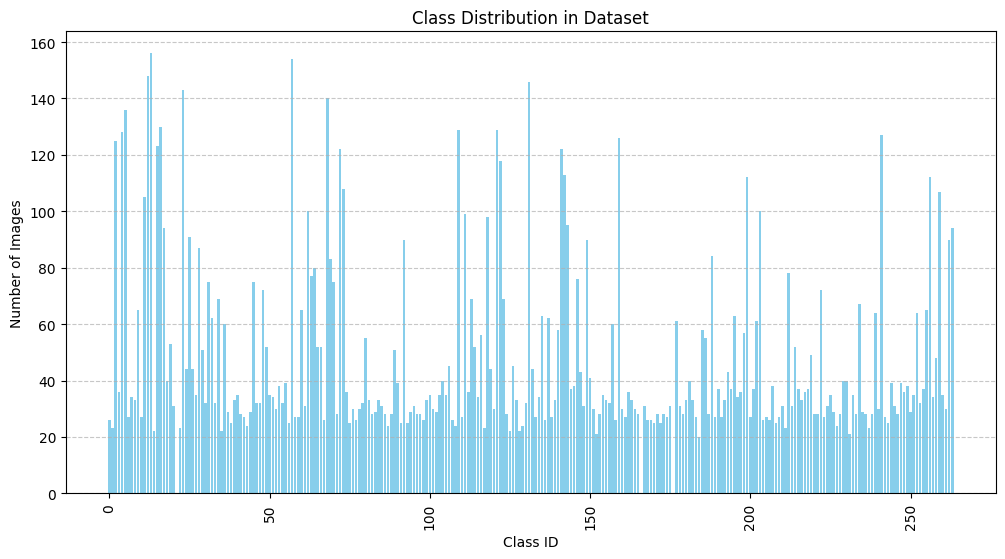

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

def get_class_distribution(label_dir):
    class_counts = defaultdict(int)

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    class_counts[class_id] += 1

    return class_counts

def plot_class_distribution(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel("Class ID")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution in Dataset")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Chemin du dossier contenant les annotations
label_dir = '/content/drive/MyDrive/Dataset_projet2/Dataset_projet2/train/labels'

# Récupérer et afficher la distribution des classes
class_counts = get_class_distribution(label_dir)
plot_class_distribution(class_counts)


##ENTRAINEMENT DU MODEL YOLO 11 l

hyper paramétres séléctionnées :
lr0: 0.005
lrf: 0.0005
conf: 0.25
iou: 0.4

In [ ]:
from ultralytics import YOLO

# chargement du modéle pré-entrainer sur dataset cococ
model = YOLO("yolo11l.pt")

# Sentrainement du modéle
model.train(data="Dataset_projet2/data.yaml", epochs=50, imgsz=640, batch=32, lr0=0.005, lrf=0.0005, device=0, flipud=0.0, fliplr=0.0, dropout=0.1)



```
New https://pypi.org/project/ultralytics/8.3.89 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/shared/home/sf48388/model/computer_vision/runs/detect/train40/weights/last.pt, data=/shared/home/sf48388/model/computer_vision/Dataset_projet2/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train40, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/shared/home/sf48388/model/computer_vision/runs/detect/train40/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=True, opset=None, workspace=None, nms=False, lr0=0.0005, lrf=0.005, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.0, box=7.5, cls=0.5, dfl=1.5, pose=12.0, kobj=1.0, nbs=64, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, bgr=0.0, mosaic=1.0, mixup=0.0, copy_paste=0.0, copy_paste_mode=flip, auto_augment=randaugment, erasing=0.4, crop_fraction=1.0, cfg=None, tracker=botsort.yaml, save_dir=runs/detect/train40
TensorBoard: Start with 'tensorboard --logdir runs/detect/train40', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  2   1455616  ultralytics.nn.modules.block.C2PSA           [512, 512, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024, 512, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  2    756736  ultralytics.nn.modules.block.C3k2            [1024, 256, 2, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  2   2365440  ultralytics.nn.modules.block.C3k2            [768, 512, 2, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024, 512, 2, True]          
 23        [16, 19, 22]  1   1614568  ultralytics.nn.modules.head.Detect           [264, [256, 512, 512]]        
YOLO11l summary: 357 layers, 25,514,024 parameters, 25,514,008 gradients, 88.4 GFLOPs

Transferred 1015/1015 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Scanning /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/labels.cache... 9463 images, 30 backgrounds, 0 corrupt: 100%|██████████| 9463/9463 [00:00<?, ?it/s]
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/2e03f7cc-c11-1_jpg.rf.1d7cd6323761ad01b5ff36fac56d1b45.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/54784ce7-e21-13_jpg.rf.8912fde49cf026f923ad5b1827c36434.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/670c5ae6-e31-4_jpg.rf.b6f6963748163c68af79d7796db9dbfd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/brightness_contrast_1741728181_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/brightness_contrast_1741728181_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/brightness_contrast_1741728181_3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/gaussian_noise_1741728181_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/gaussian_noise_1741728181_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/motion_blur_1741728181_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/motion_blur_1741728181_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/motion_blur_1741728181_3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/motion_blur_1741728181_4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/rotation_1741728180_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/rotation_1741728180_3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/rotation_1741728180_4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/scaling_1741728181_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/scaling_1741728181_4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/shadow_1741728181_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/shadow_1741728181_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/shadow_1741728181_3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/shadow_1741728181_4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/sign4_jpg.rf.552334b8dffc9d619eed7cb9389a0314.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/sign4_jpg.rf.7bc9256bfd7c3e180f73e9e30a9dbf5e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/translation_1741728180_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/translation_1741728180_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/translation_1741728180_3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/train/images/translation_1741728180_4.jpg: 1 duplicate labels removed
val: Scanning /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/labels.cache... 2366 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2366/2366 [00:00<?, ?it/s]
val: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/images/brightness_contrast_1741728181_4.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/images/gaussian_noise_1741728181_3.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/images/gaussian_noise_1741728181_4.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/images/rotation_1741728180_2.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/images/scaling_1741728181_2.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /shared/home/sf48388/model/computer_vision/Dataset_projet2/valid/images/scaling_1741728181_3.jpg: 1 duplicate labels removed
Plotting labels to runs/detect/train40/labels.jpg...
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically...
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Resuming training /shared/home/sf48388/model/computer_vision/runs/detect/train40/weights/last.pt from epoch 53 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train40
Starting training for 50 epochs...
Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        1/50      21.3G       3.07      5.988      4.181         72        640: 100%|██████████| 296/296 [01:48<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.63it/s]
                   all       2366       3032    3.6e-05    0.00115   3.18e-05   7.42e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/50      20.7G      3.034      5.956      4.107        101        640:  25%|██▌       | 75/296 [00:27<01:19,  2.78it/s]
        2/50      20.7G      2.936      5.959      3.991         94        640: 100%|██████████| 296/296 [01:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.98it/s]
                   all       2366       3032          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        3/50      20.7G      2.379      5.812      3.474         61        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:11<00:00,  3.13it/s]
                   all       2366       3032    0.00183      0.036    0.00138   0.000624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        4/50      20.7G       1.67       5.23      2.754         71        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.96it/s]
                   all       2366       3032    0.00274      0.302     0.0114    0.00814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        5/50      20.7G      1.407       4.86      2.386        111        640:  96%|█████████▌| 284/296 [01:35<00:04,  2.94it/s]
        6/50      20.7G      1.407      4.858      2.384         86        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.00it/s]
                   all       2366       3032    0.00297      0.419      0.012    0.00914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/50      20.8G      0.229     0.6776     0.9525         72        640: 100%|██████████| 296/296 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.87it/s]
                   all       2366       3032      0.872      0.913      0.948      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/50      20.7G     0.2256     0.6759     0.9519         94        640: 100%|██████████| 296/296 [01:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                   all       2366       3032      0.924      0.886      0.948      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/50      20.7G     0.2248     0.6767     0.9535         61        640: 100%|██████████| 296/296 [01:39<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.05it/s]
                   all       2366       3032      0.913      0.887      0.947      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/100      20.7G     0.2251     0.6767     0.9518         71        640: 100%|██████████| 296/296 [01:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                   all       2366       3032      0.925      0.881      0.951      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/50      20.7G      0.223     0.6654      0.948         86        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                   all       2366       3032       0.91      0.887      0.953      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/50      20.7G     0.2216     0.6572     0.9497         68        640: 100%|██████████| 296/296 [01:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.99it/s]
                   all       2366       3032      0.894      0.902       0.95      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/50      20.7G      0.223     0.6451     0.9502         87        640: 100%|██████████| 296/296 [01:38<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                   all       2366       3032      0.889      0.904      0.951       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/50      20.7G     0.2212     0.6512     0.9486         83        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                   all       2366       3032      0.866      0.913       0.95      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/50      20.7G      0.218     0.6405     0.9483         80        640: 100%|██████████| 296/296 [01:39<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.04it/s]
                   all       2366       3032      0.885      0.911       0.95       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/50      20.7G     0.2144     0.6342     0.9456        113        640:  60%|█████▉    | 177/296 [00:59<00:40,  2.97it/s]
     39/50      20.7G     0.2165     0.6414     0.9465         70        640: 100%|██████████| 296/296 [01:39<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.01it/s]
                   all       2366       3032      0.878      0.911      0.952      0.923
                    Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/50      20.8G     0.2045     0.5821     0.9405         72        640: 100%|██████████| 296/296 [01:39<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.86it/s]
                   all       2366       3032      0.894      0.907      0.953      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/50      20.7G     0.2003     0.5796     0.9389         94        640: 100%|██████████| 296/296 [01:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.04it/s]
                   all       2366       3032      0.924       0.89      0.952      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/50      20.7G     0.2005     0.5836     0.9413         61        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.04it/s]
                   all       2366       3032      0.919      0.893      0.954      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/50      20.7G     0.2017     0.5817     0.9401         71        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                   all       2366       3032      0.919      0.893      0.956      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/50      20.7G     0.2008     0.5779     0.9373         86        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.96it/s]
                   all       2366       3032      0.906      0.902      0.956      0.927
                    Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/50      20.7G     0.1973     0.5715     0.9373         68        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                   all       2366       3032      0.897      0.907      0.953      0.925
                    Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/50      20.8G     0.1861     0.5153     0.9309         72        640: 100%|██████████| 296/296 [01:40<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.86it/s]
                   all       2366       3032      0.898      0.905      0.954      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/50      20.7G     0.1844     0.5121     0.9307         94        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.03it/s]
                   all       2366       3032       0.89      0.915      0.955      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/50      20.7G     0.1852     0.5178     0.9331         61        640: 100%|██████████| 296/296 [01:39<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                   all       2366       3032      0.891      0.909      0.954      0.924
                    Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/50      20.8G     0.1721     0.4574     0.9236         72        640: 100%|██████████| 296/296 [01:39<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.86it/s]
                   all       2366       3032      0.905      0.906      0.952      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/50      20.7G      0.173     0.4689      0.925         94        640: 100%|██████████| 296/296 [01:39<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  3.02it/s]
                   all       2366       3032      0.912        0.9      0.952      0.924


                   
```



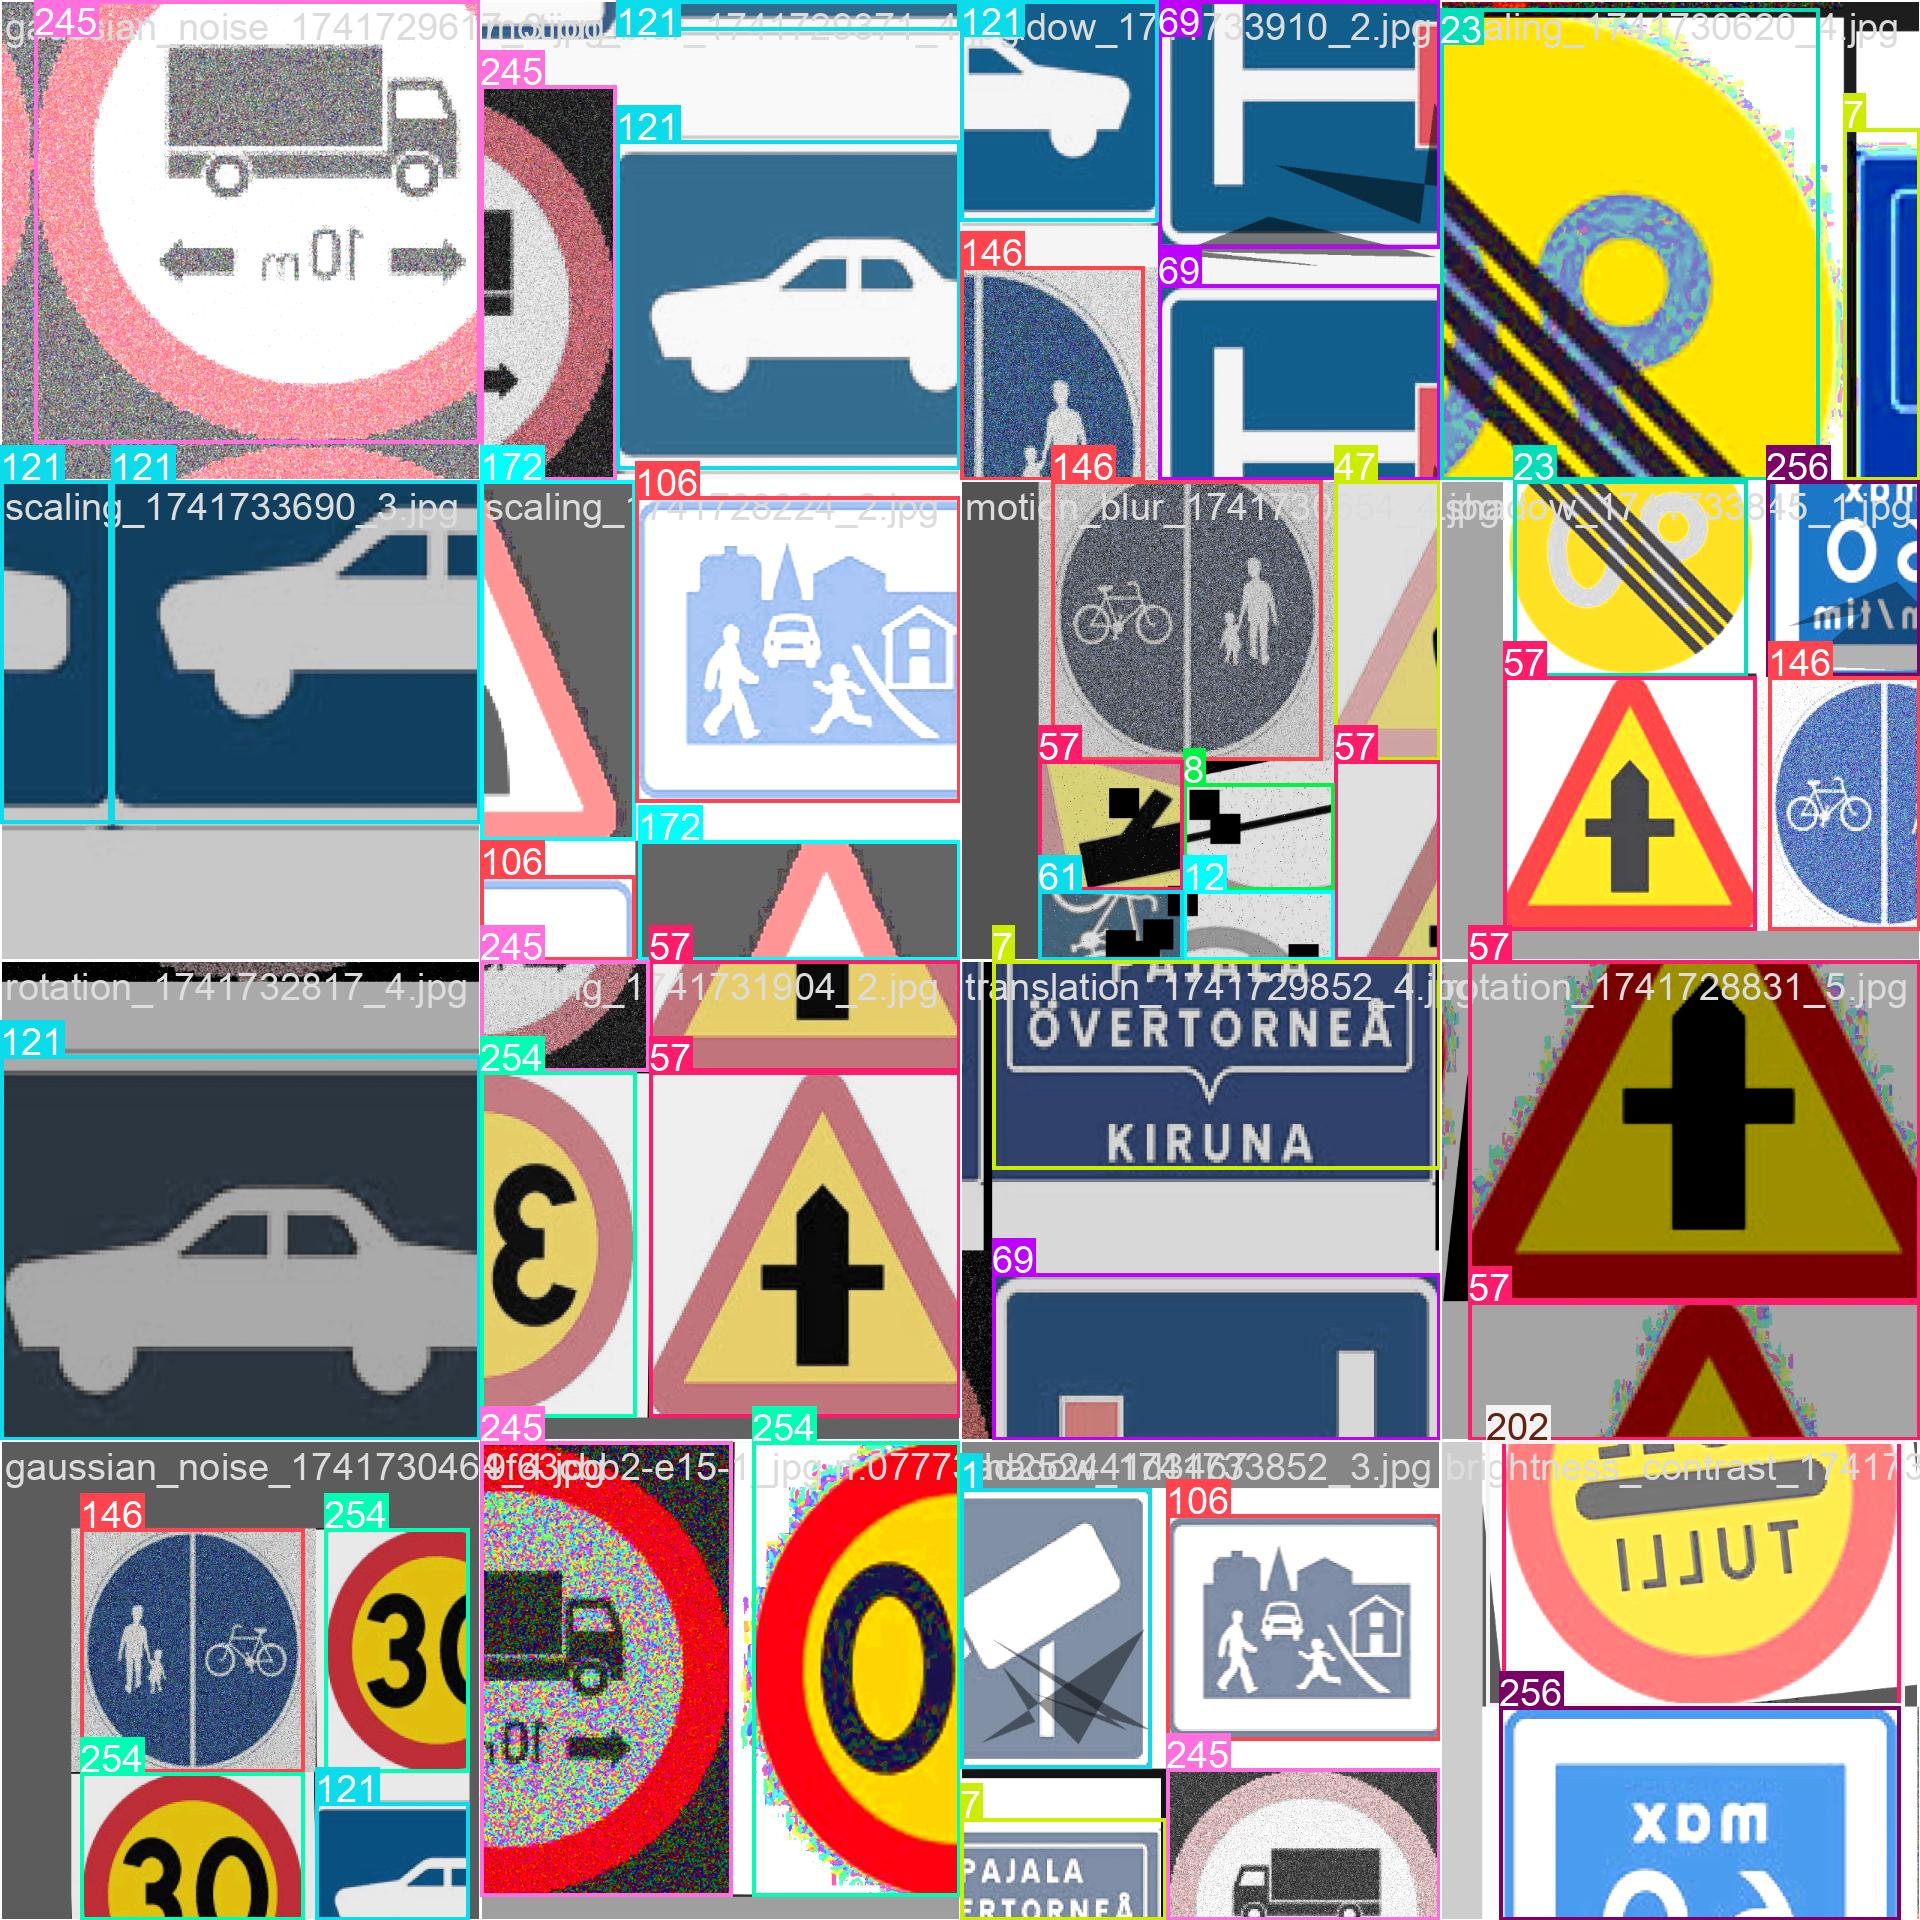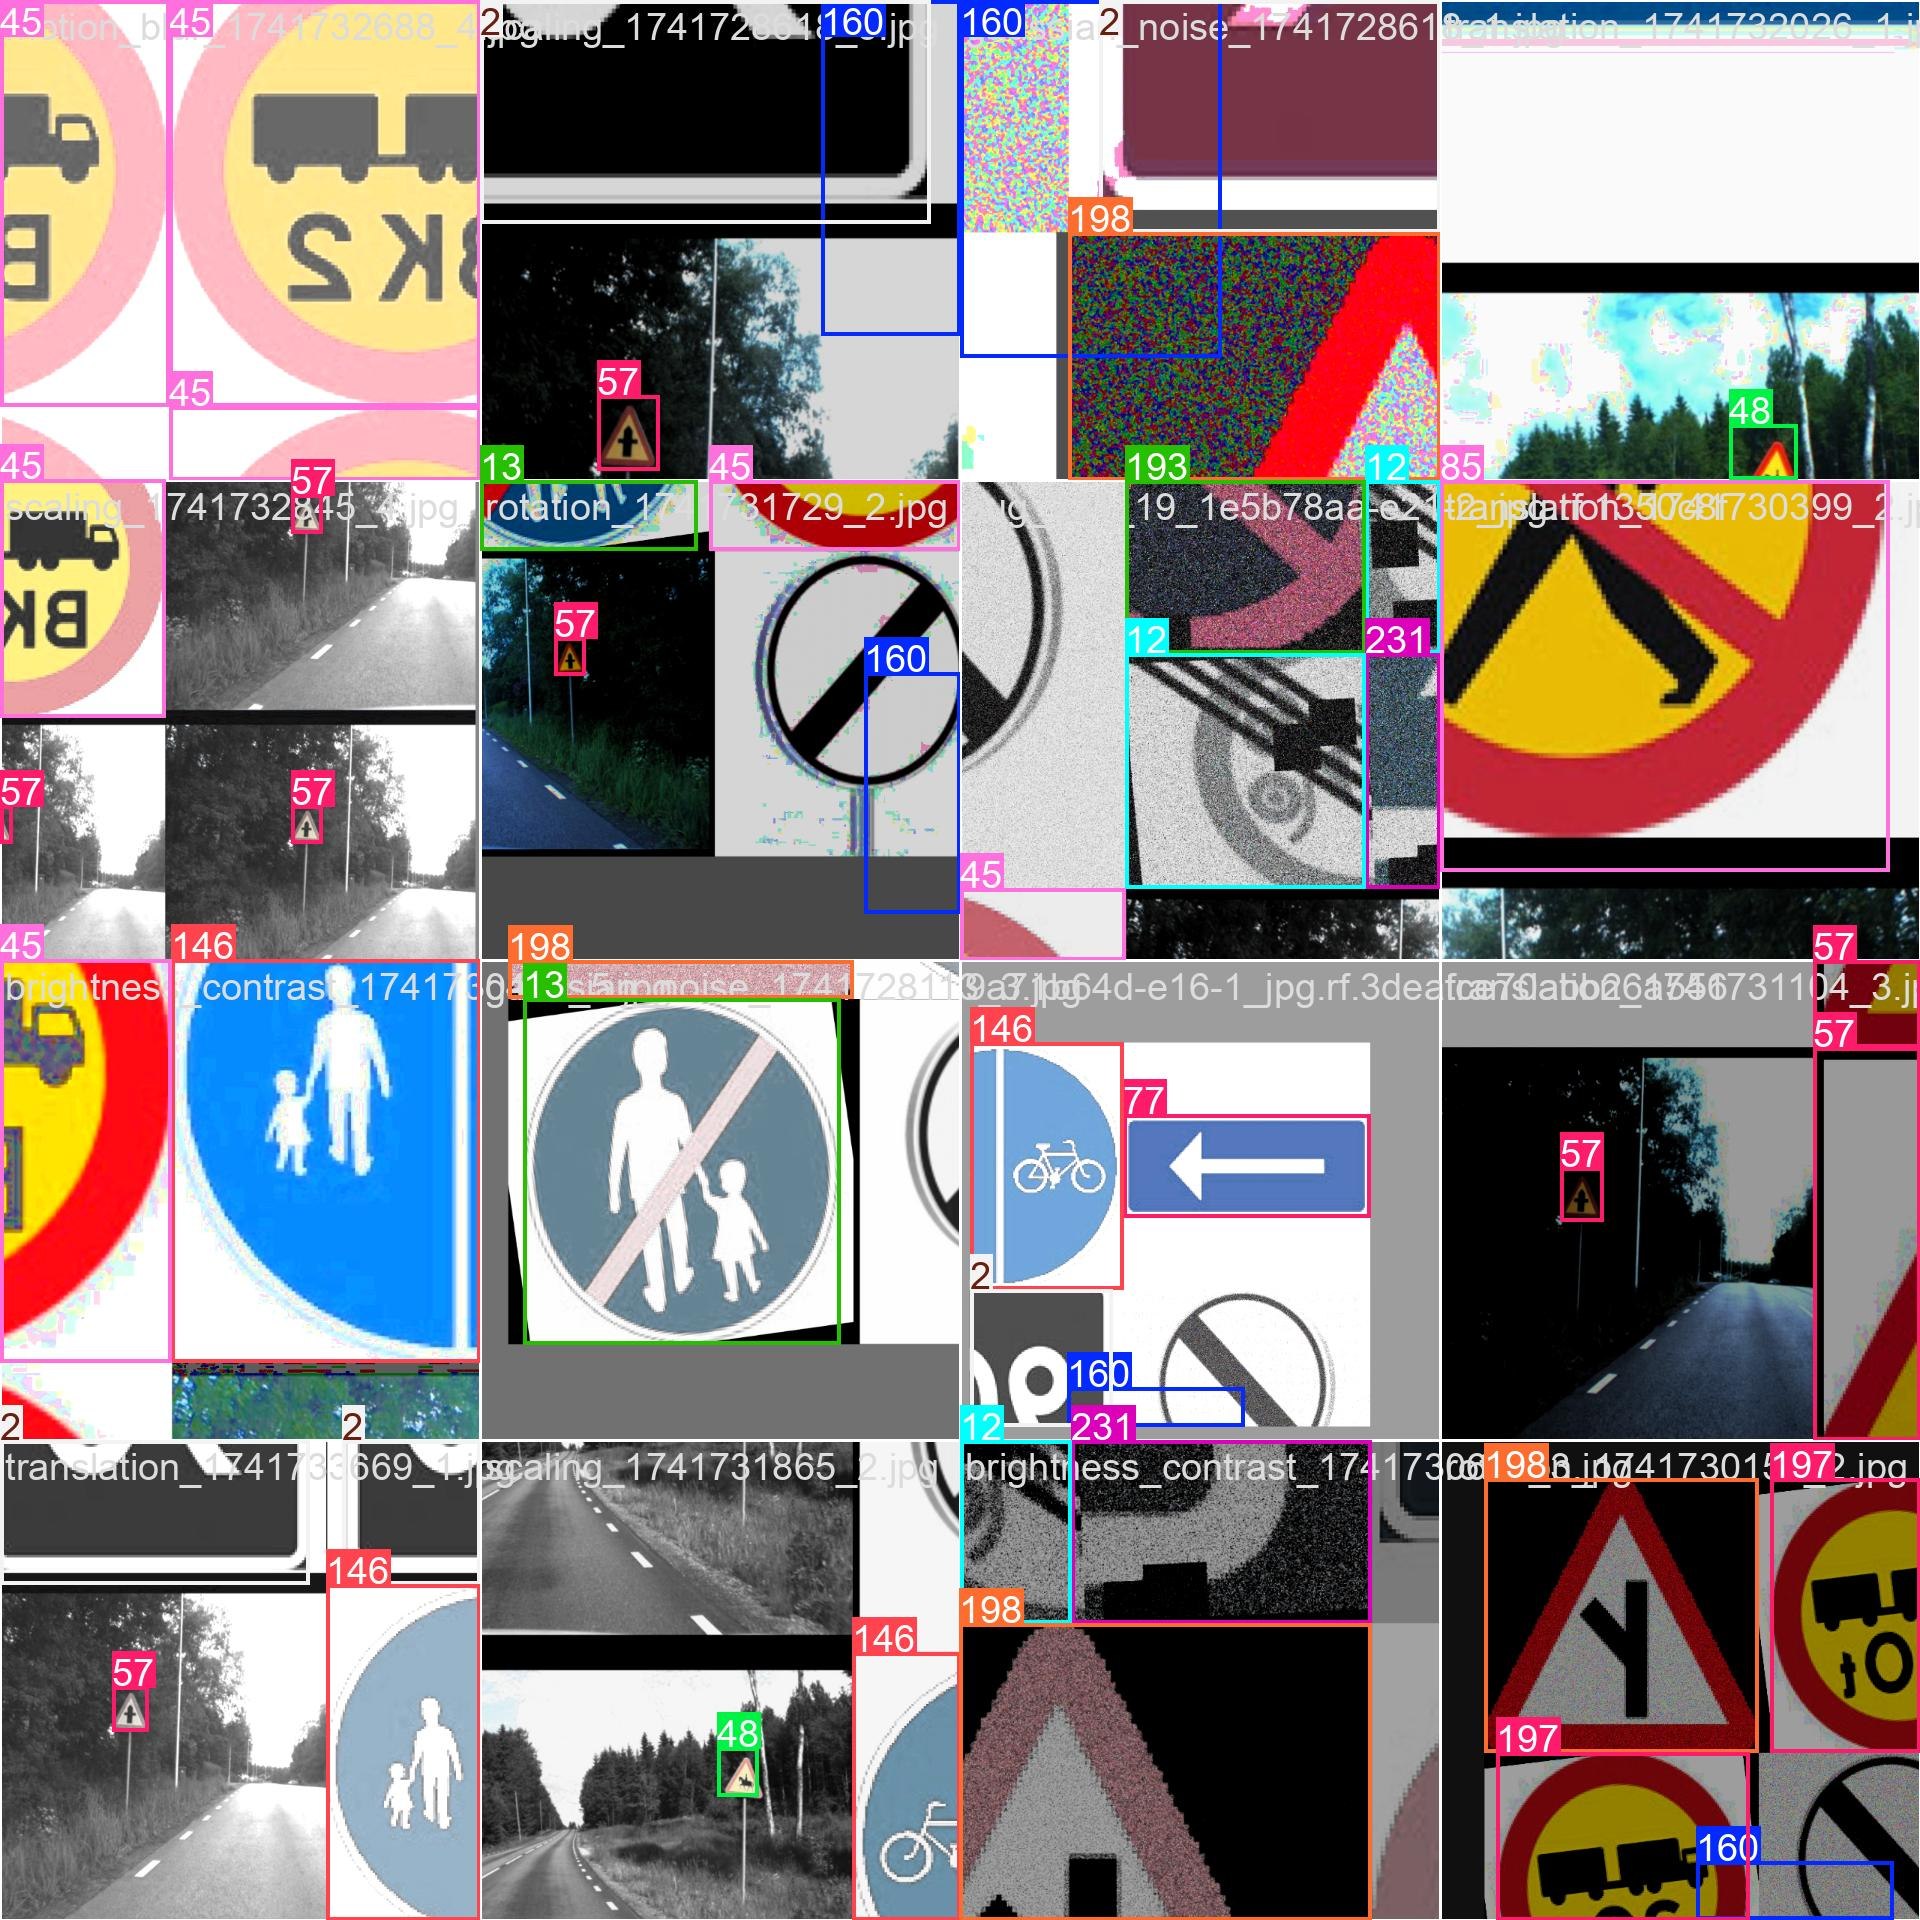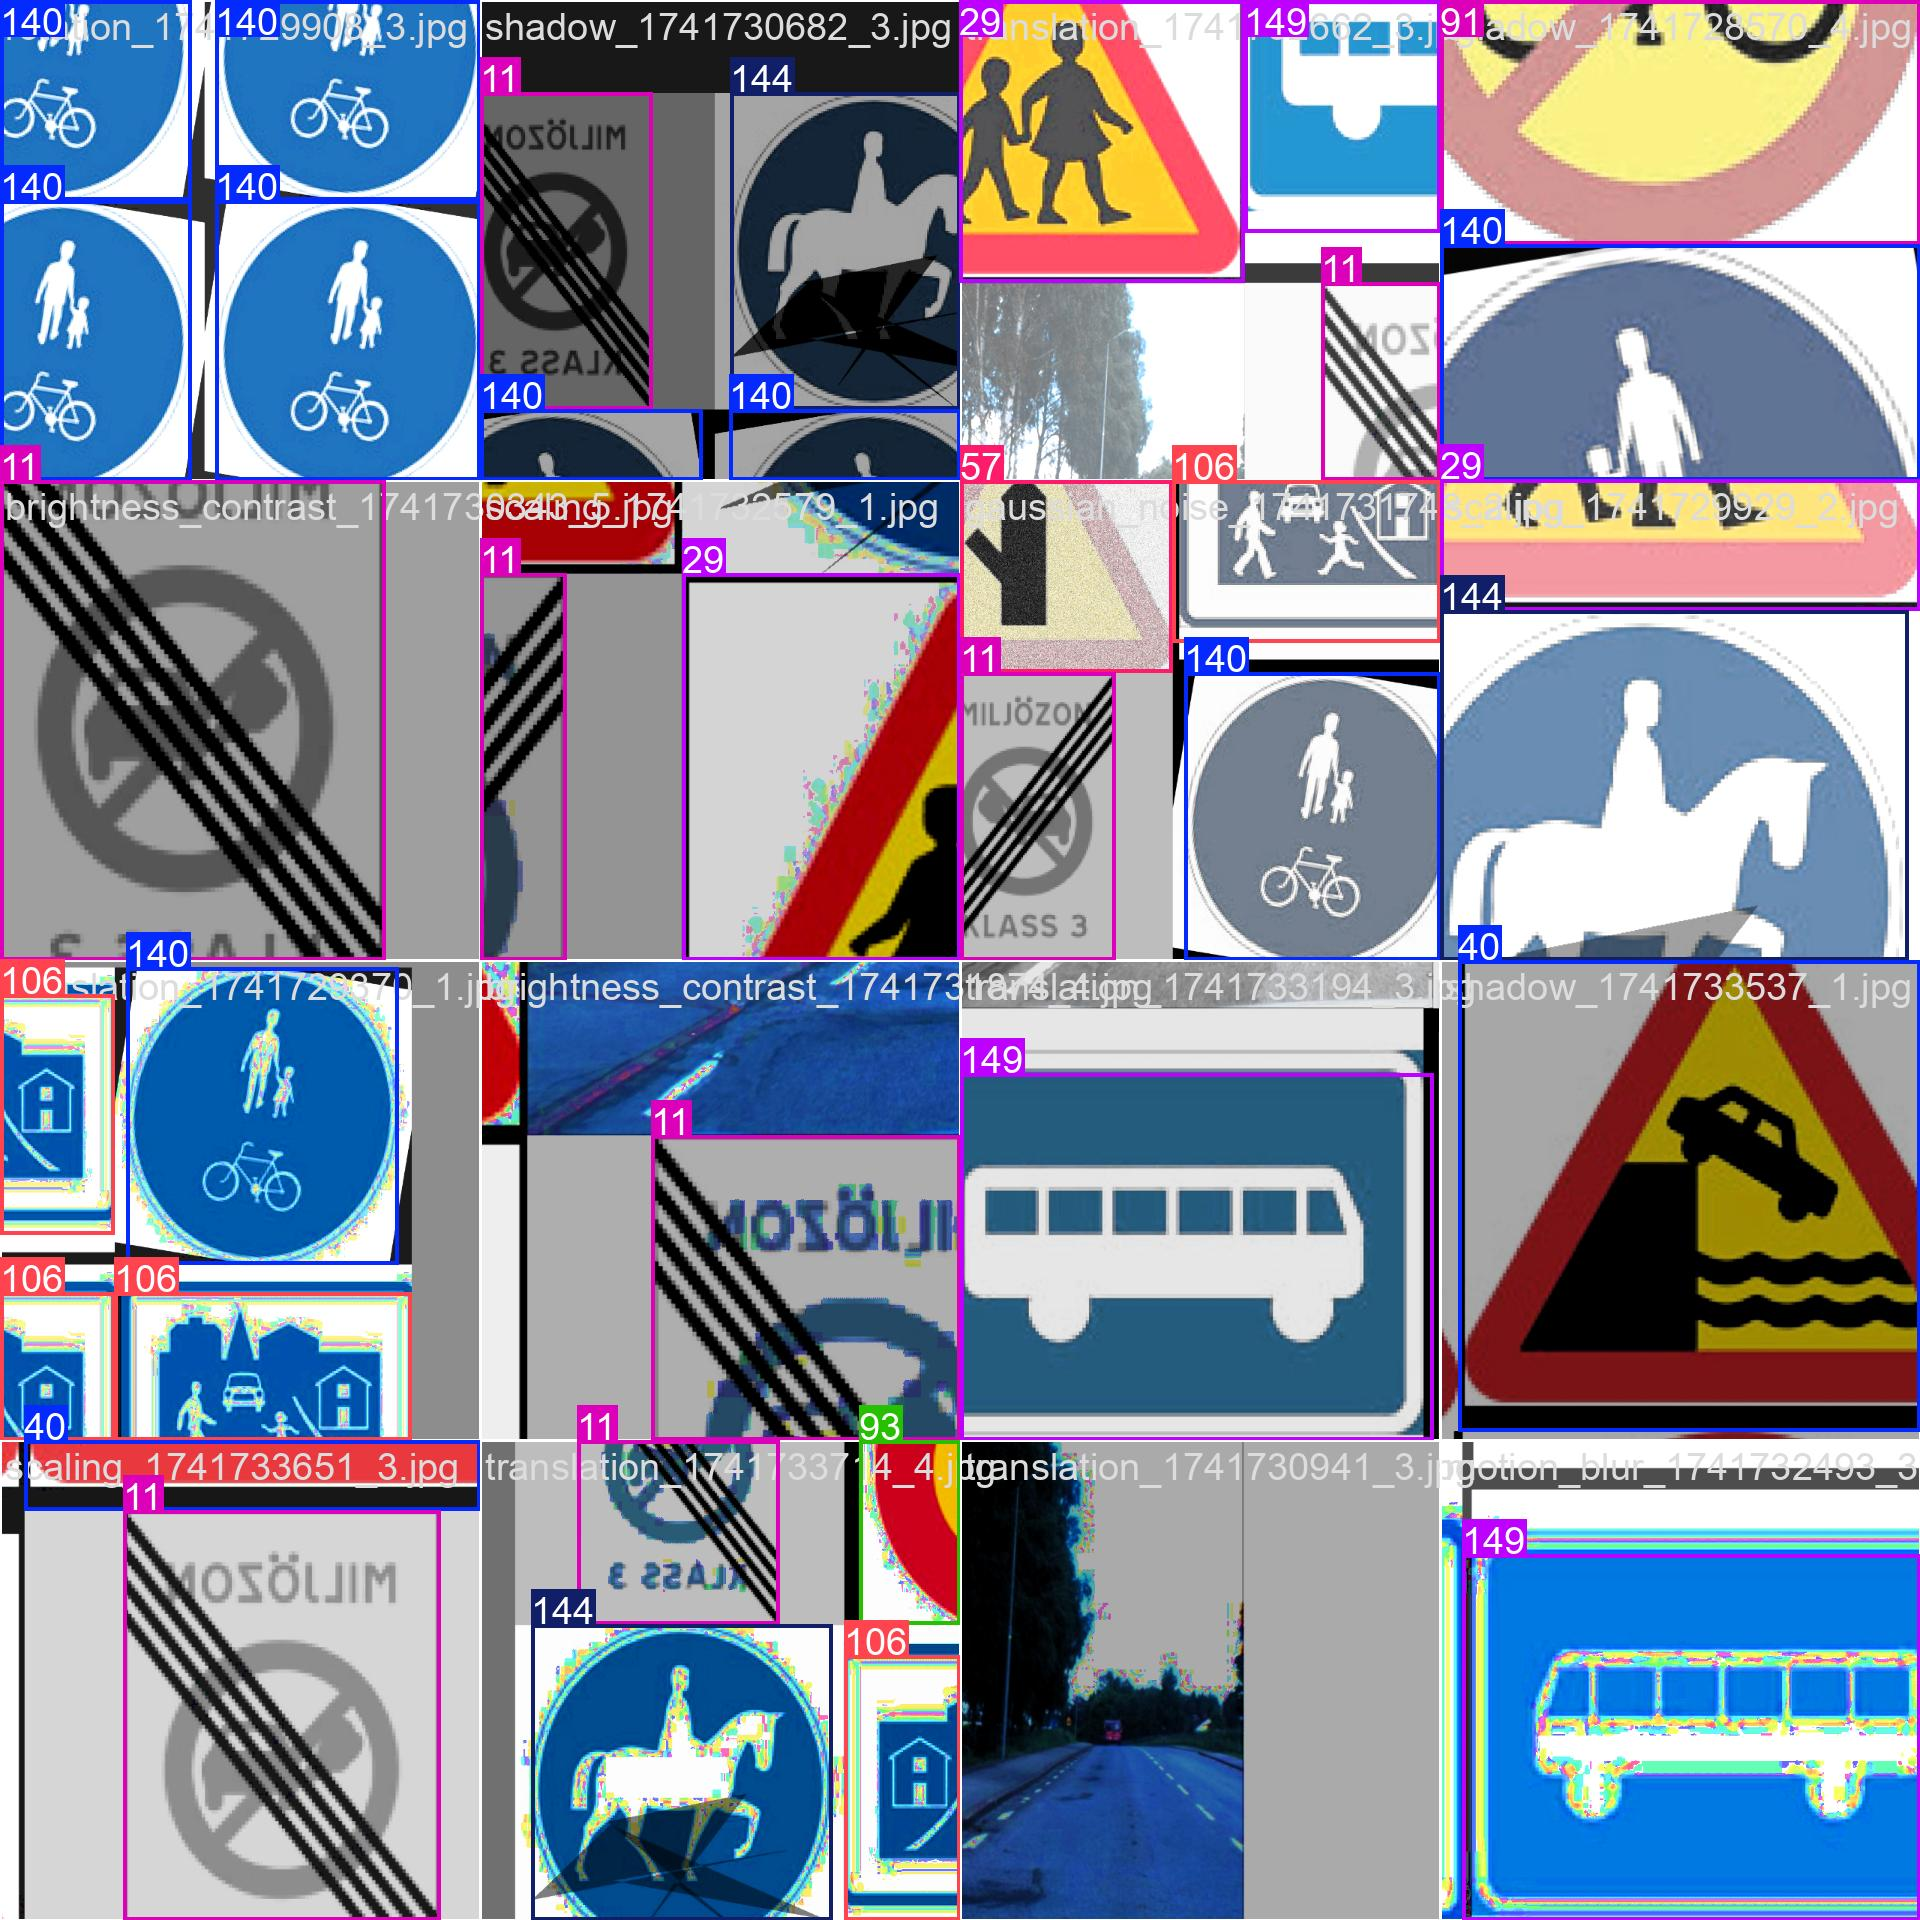

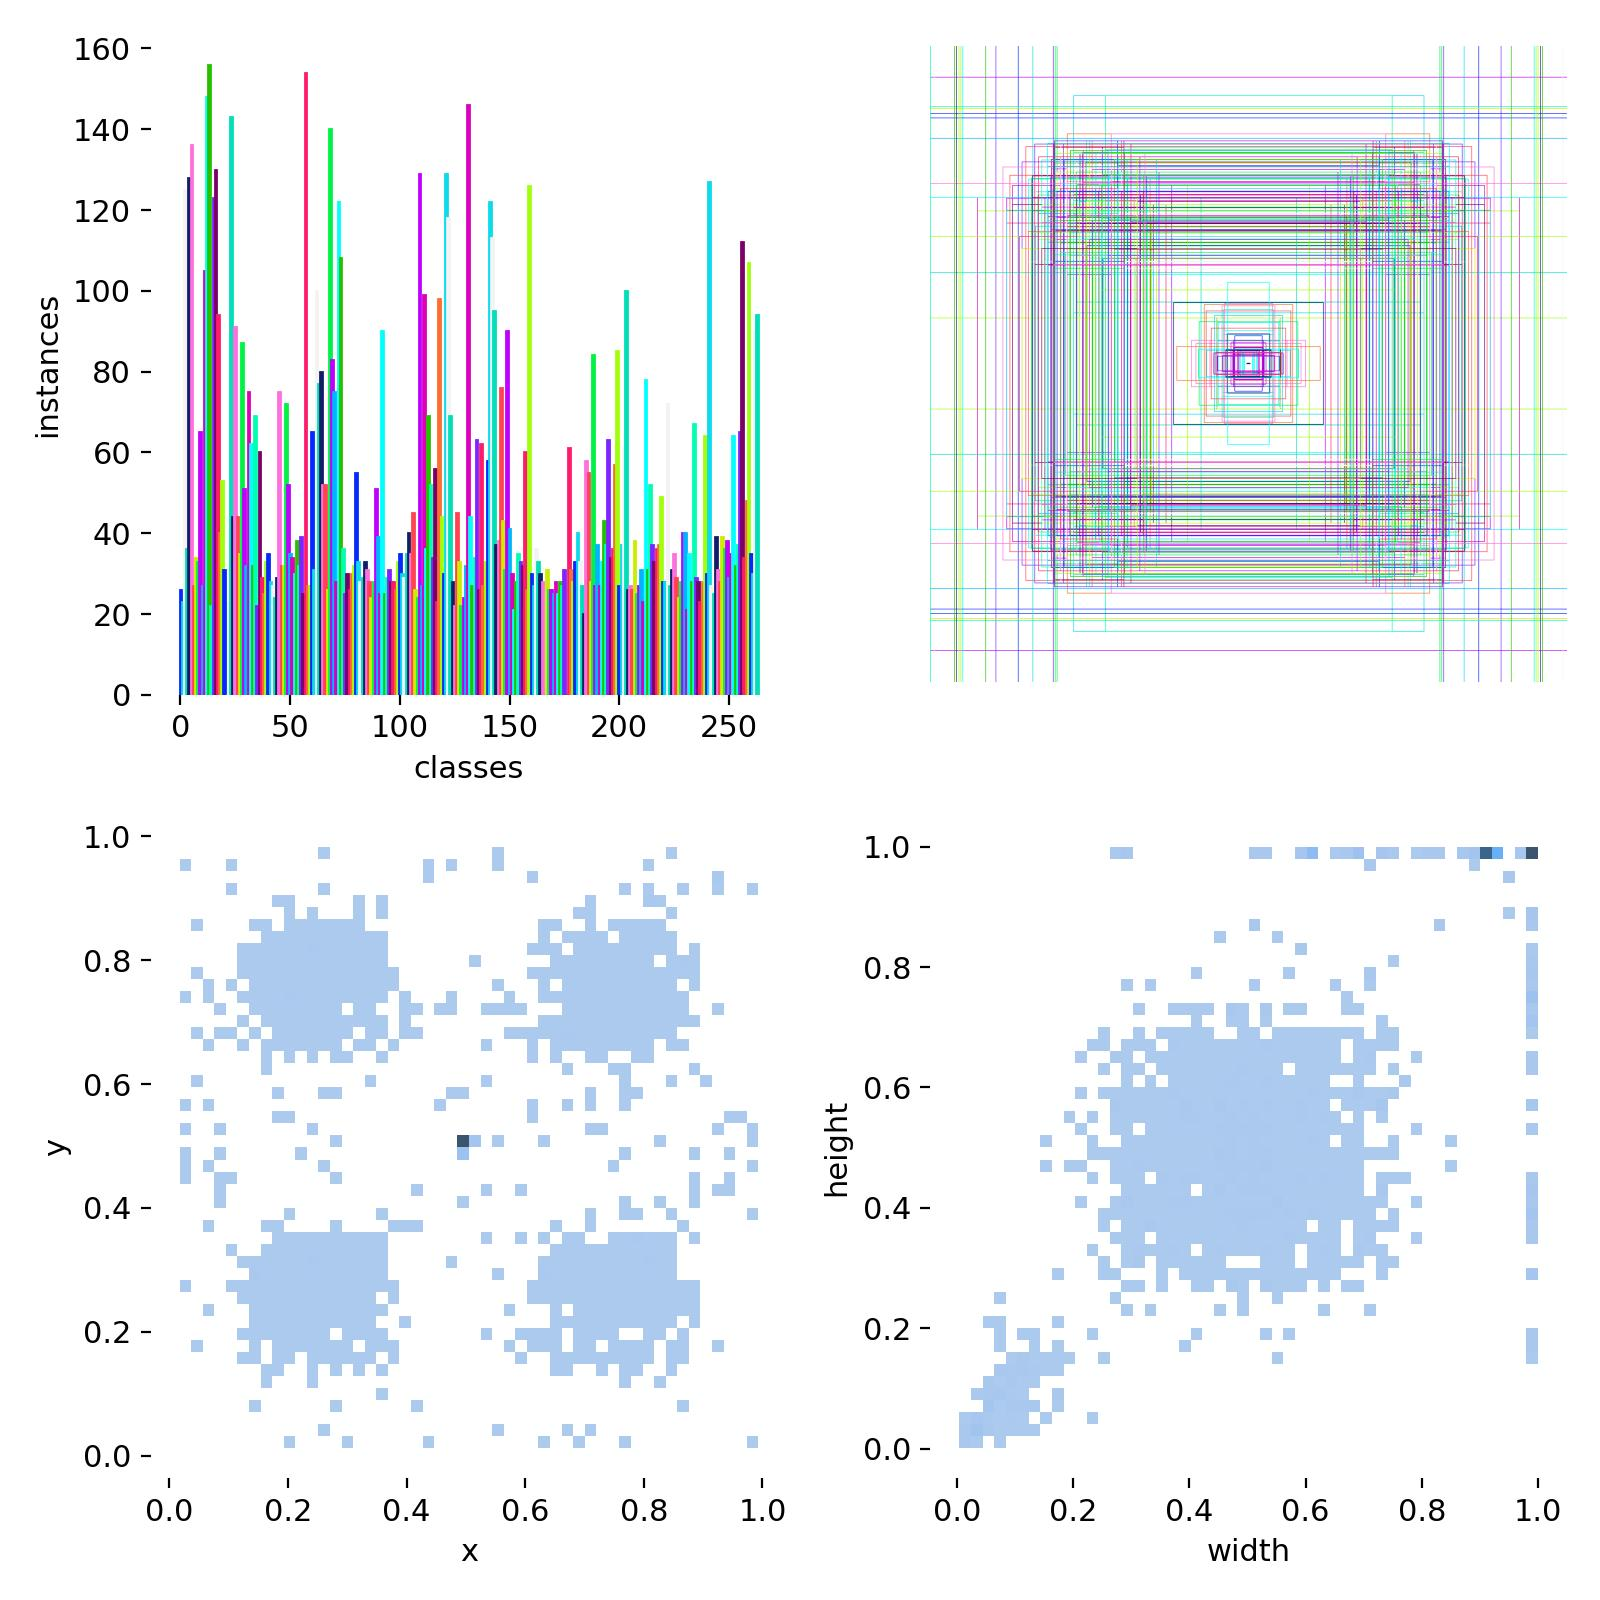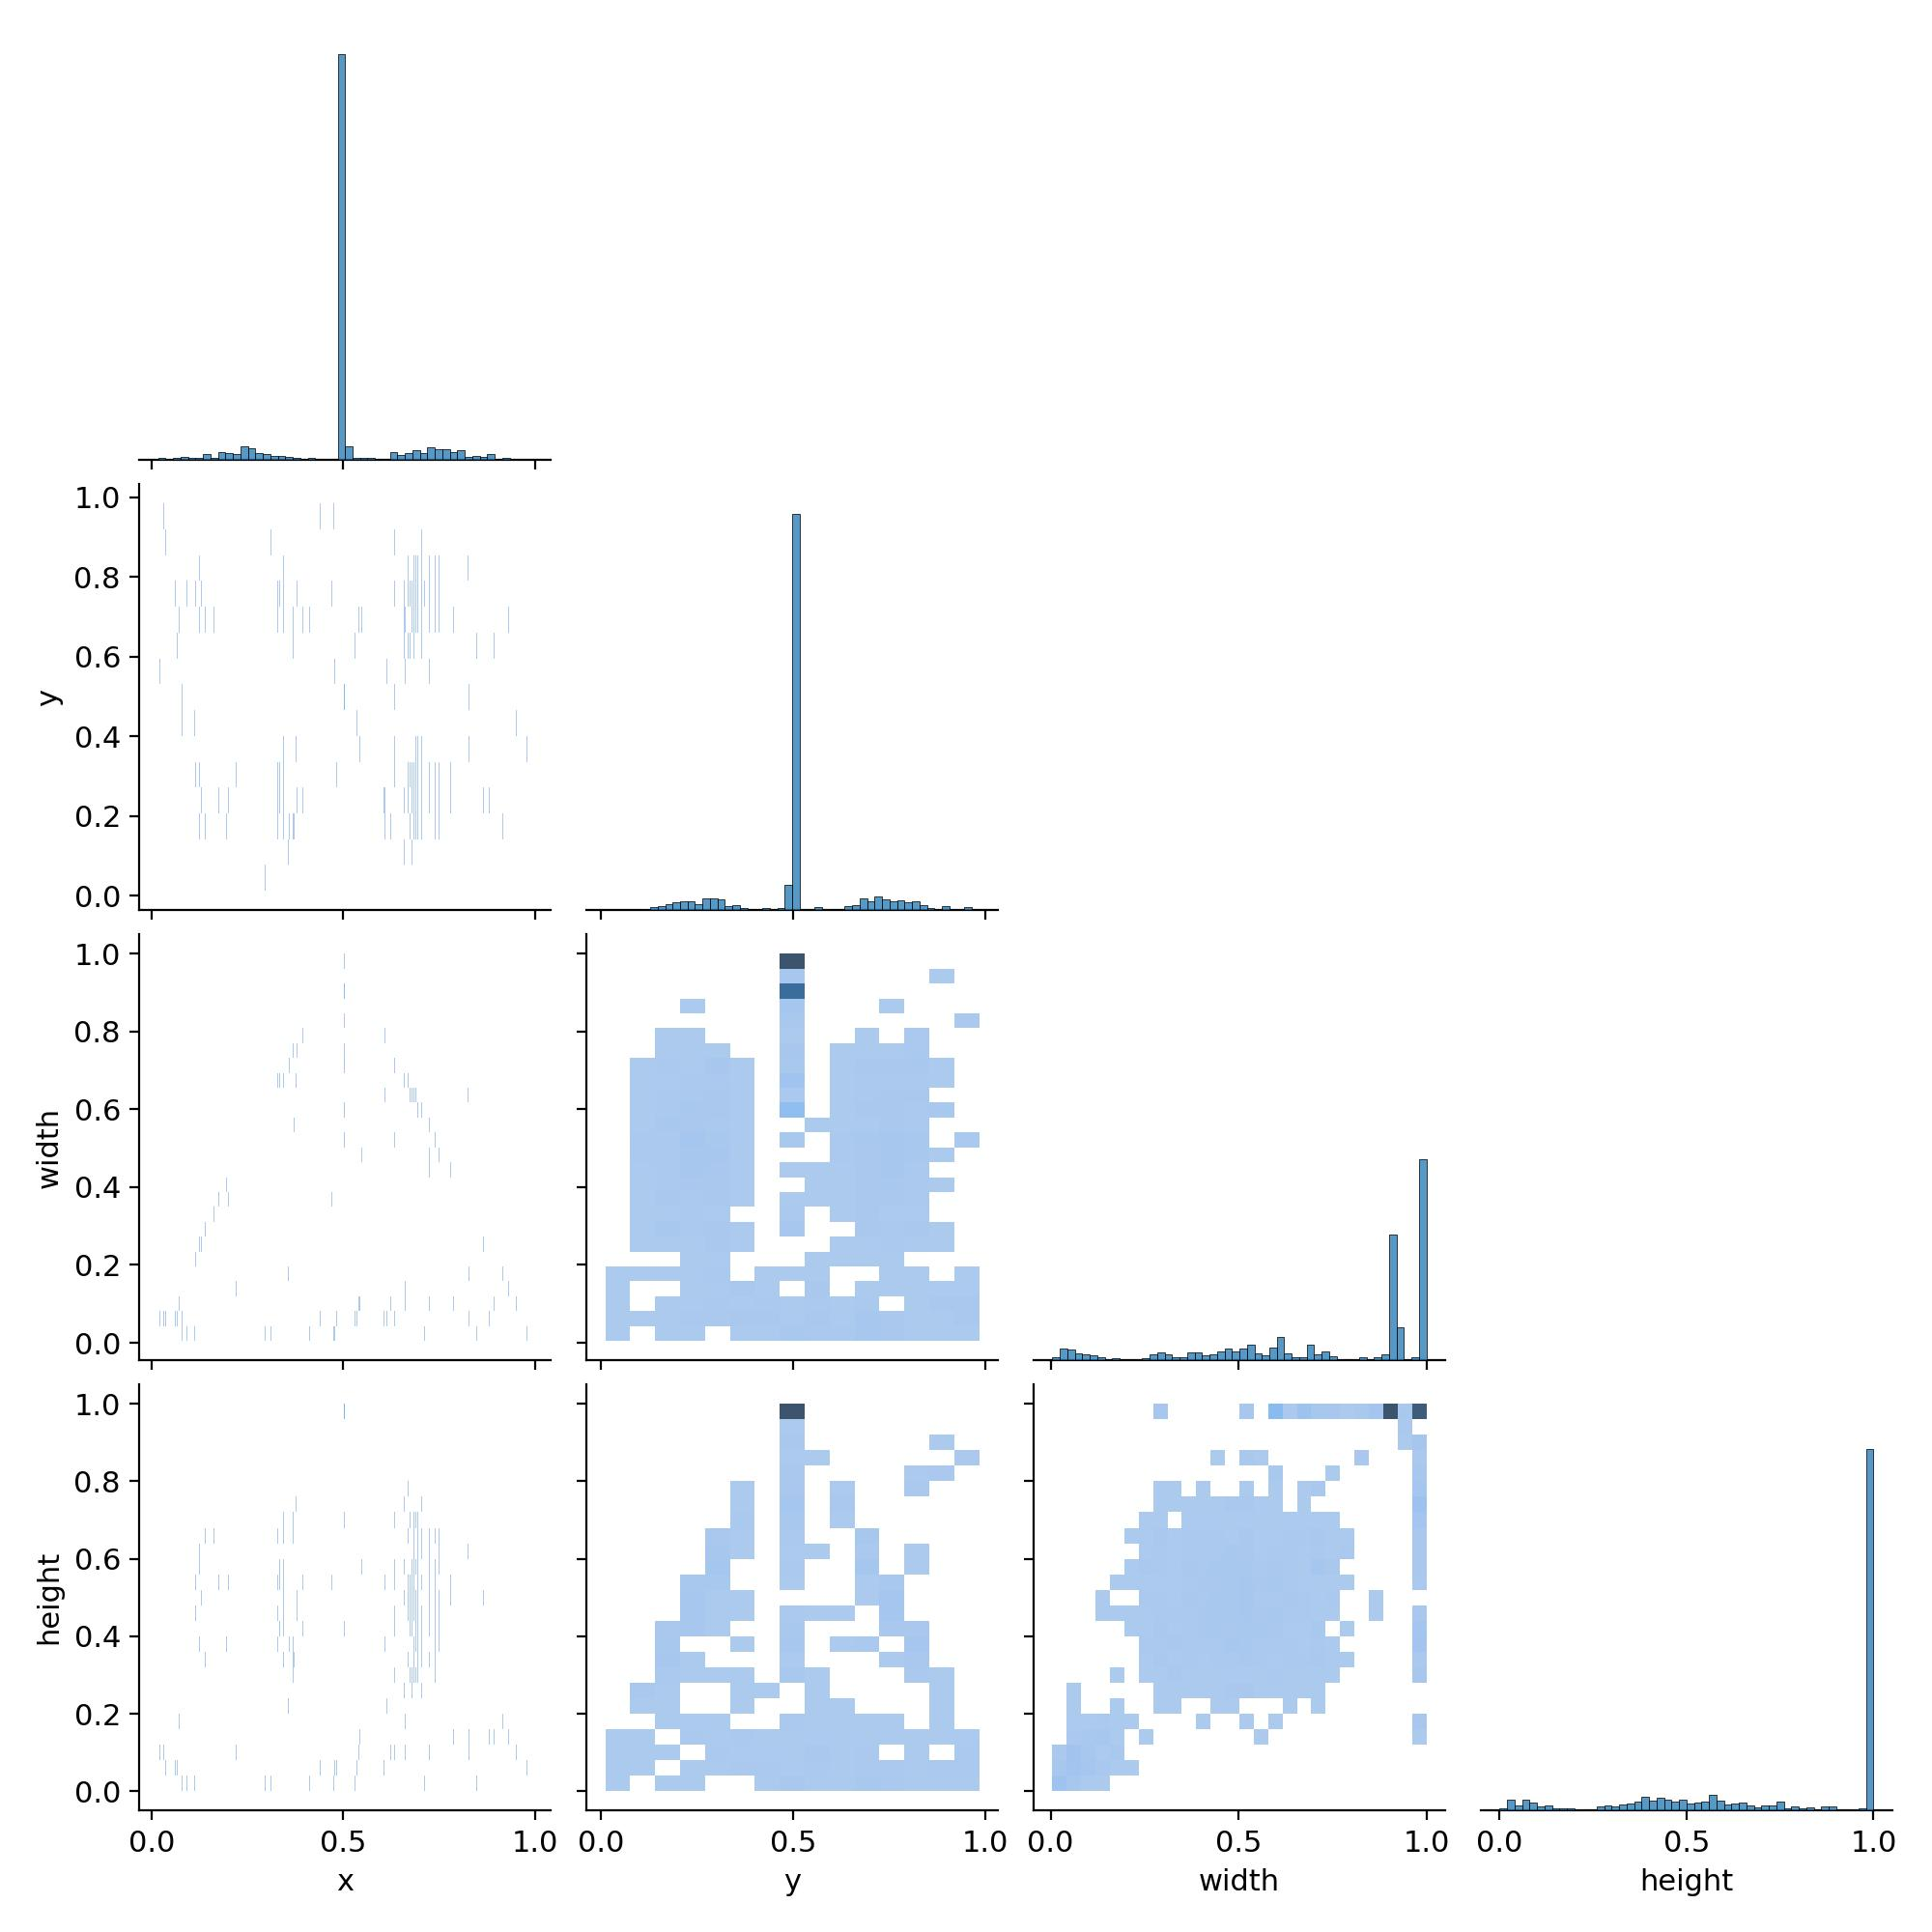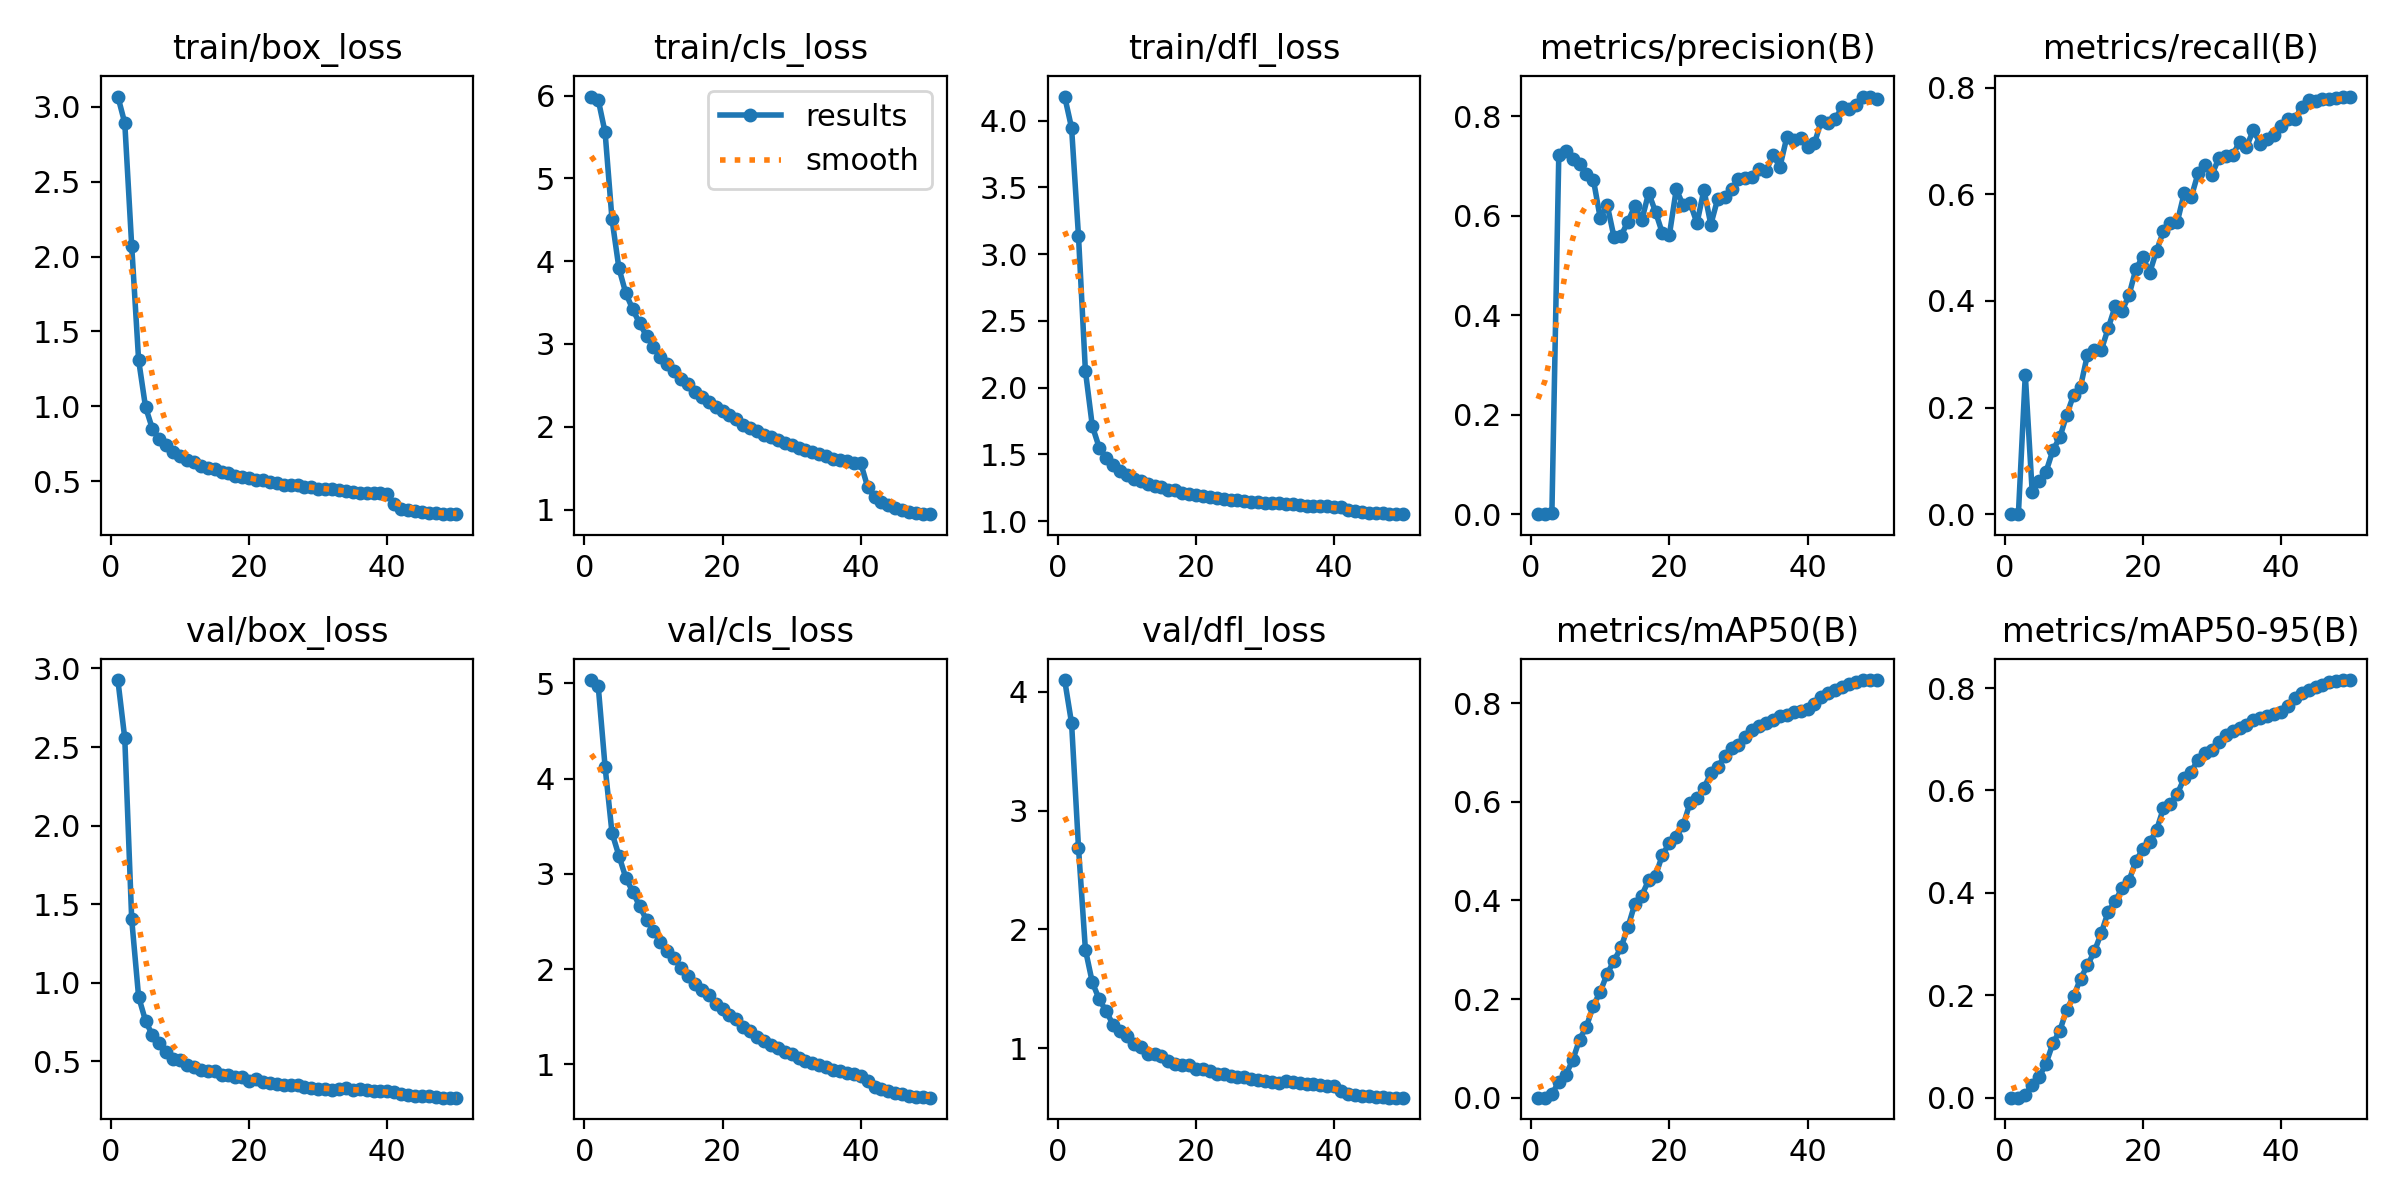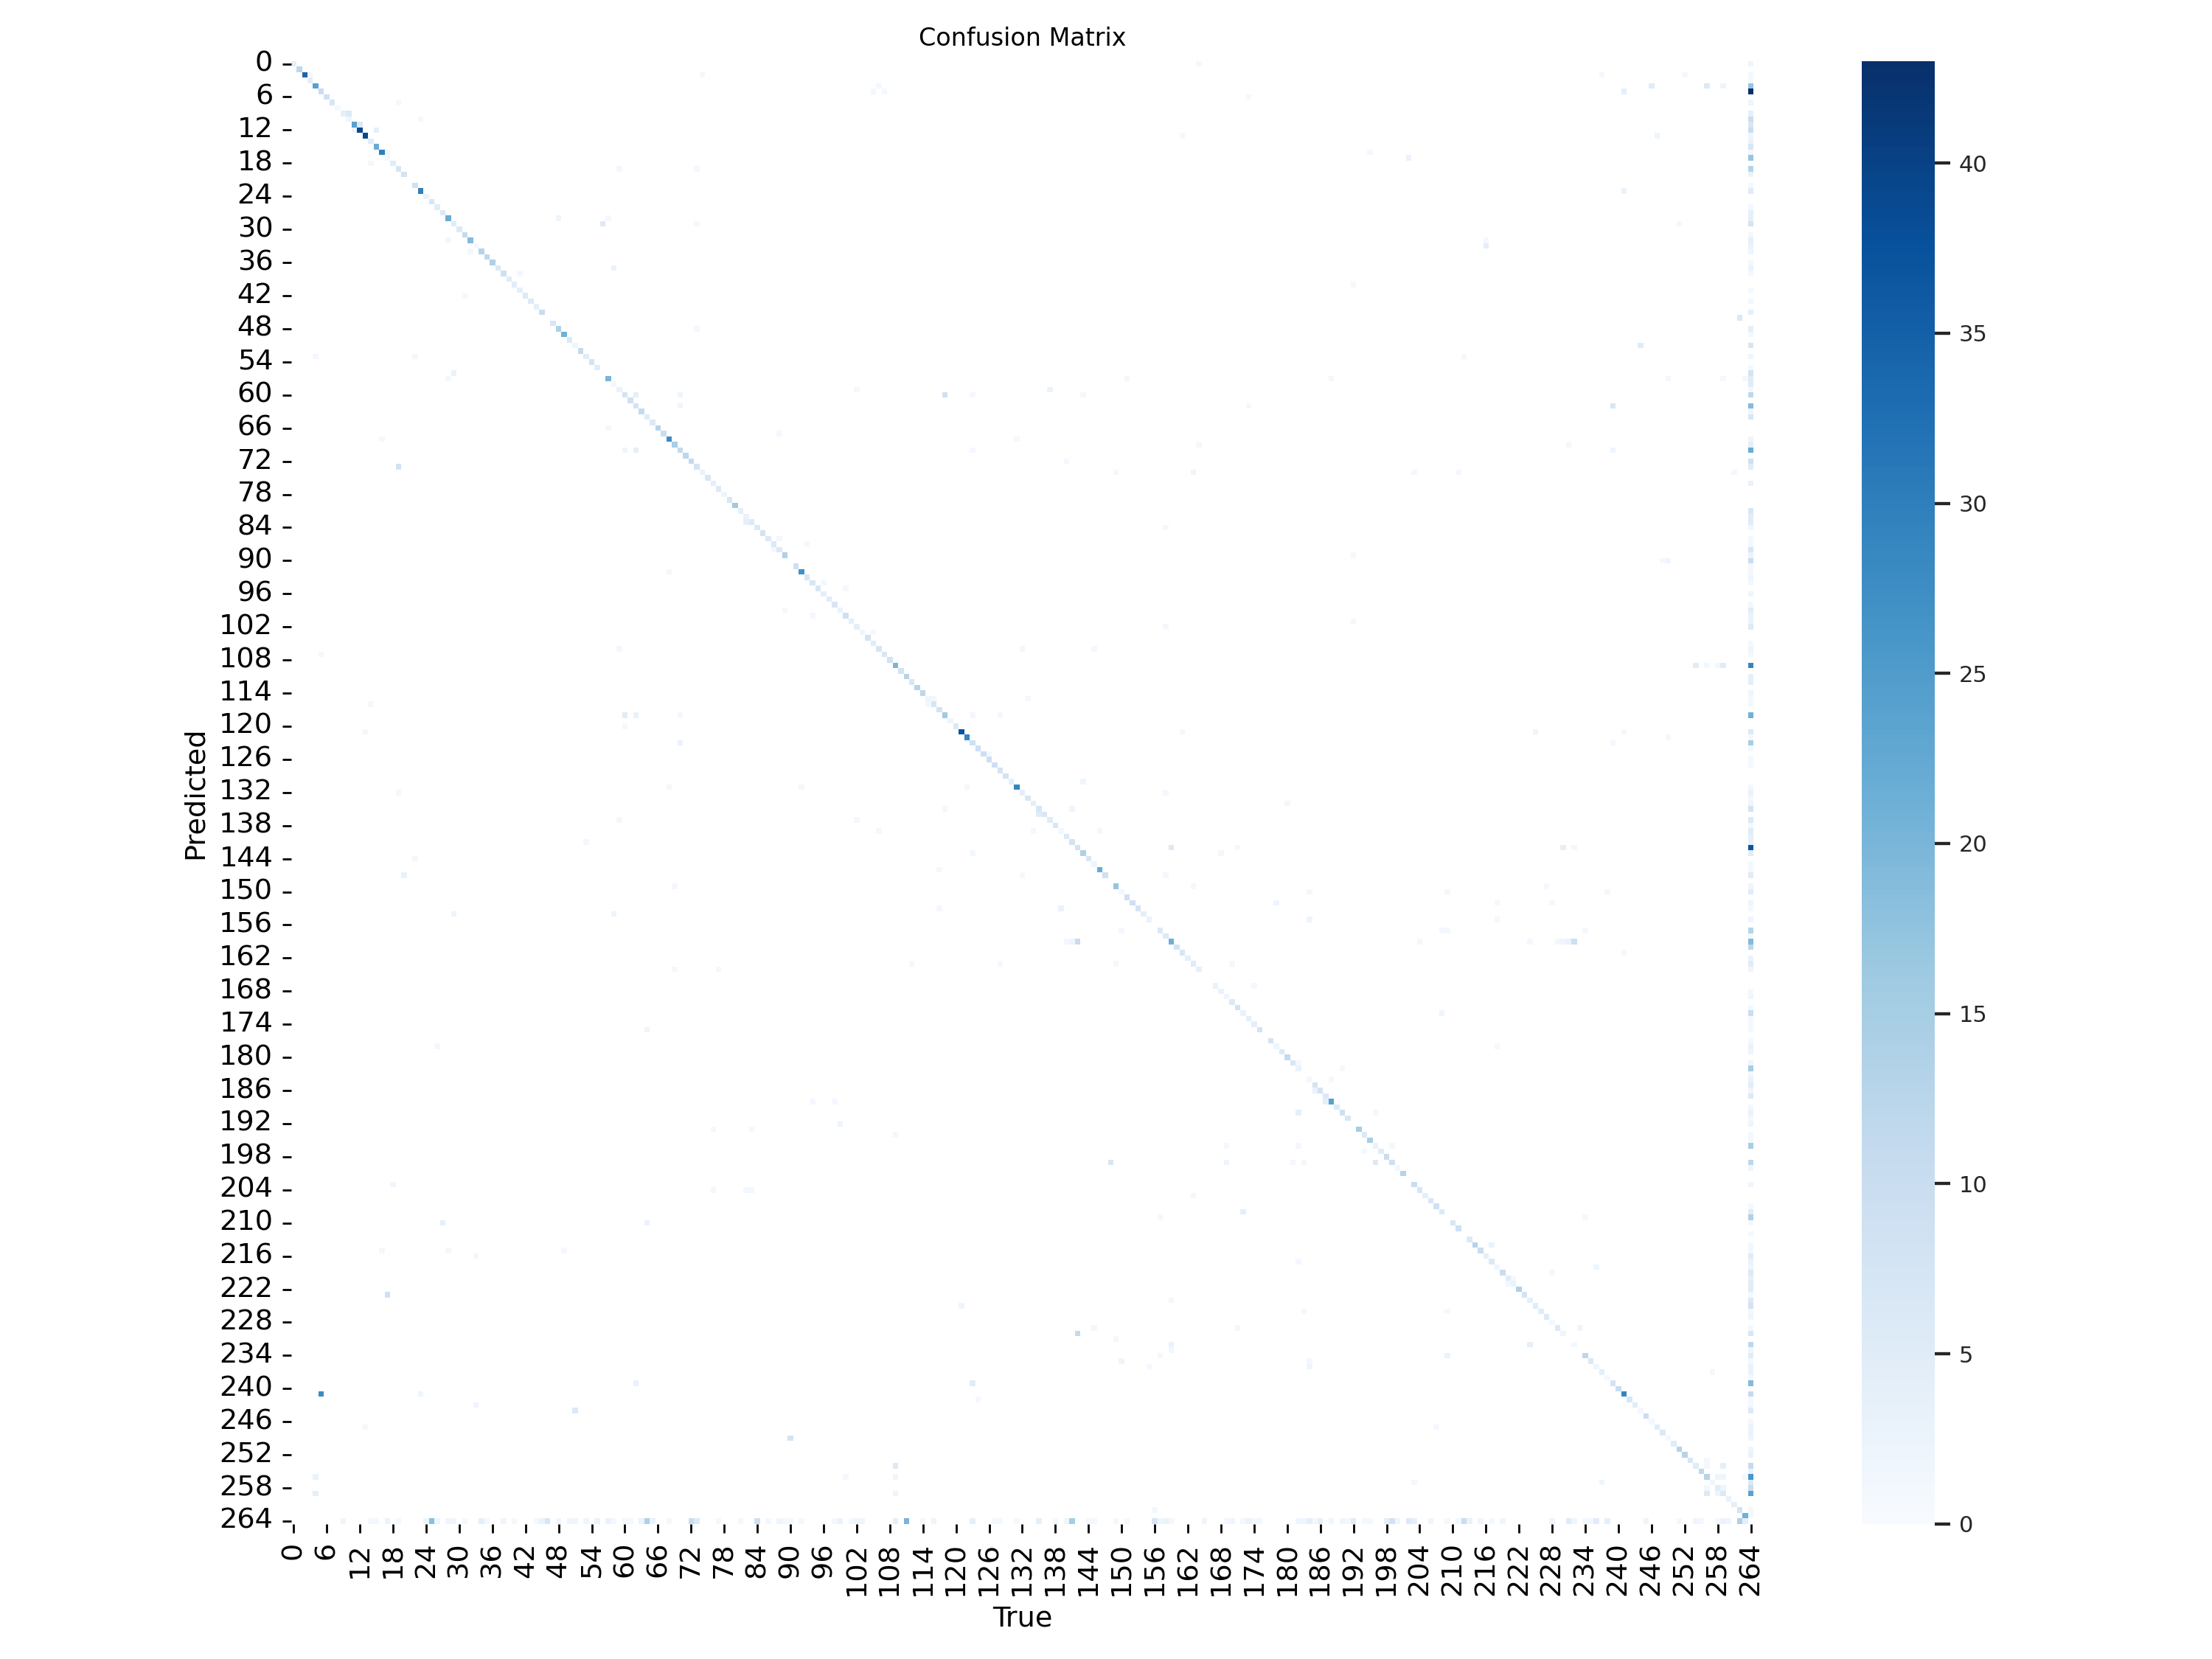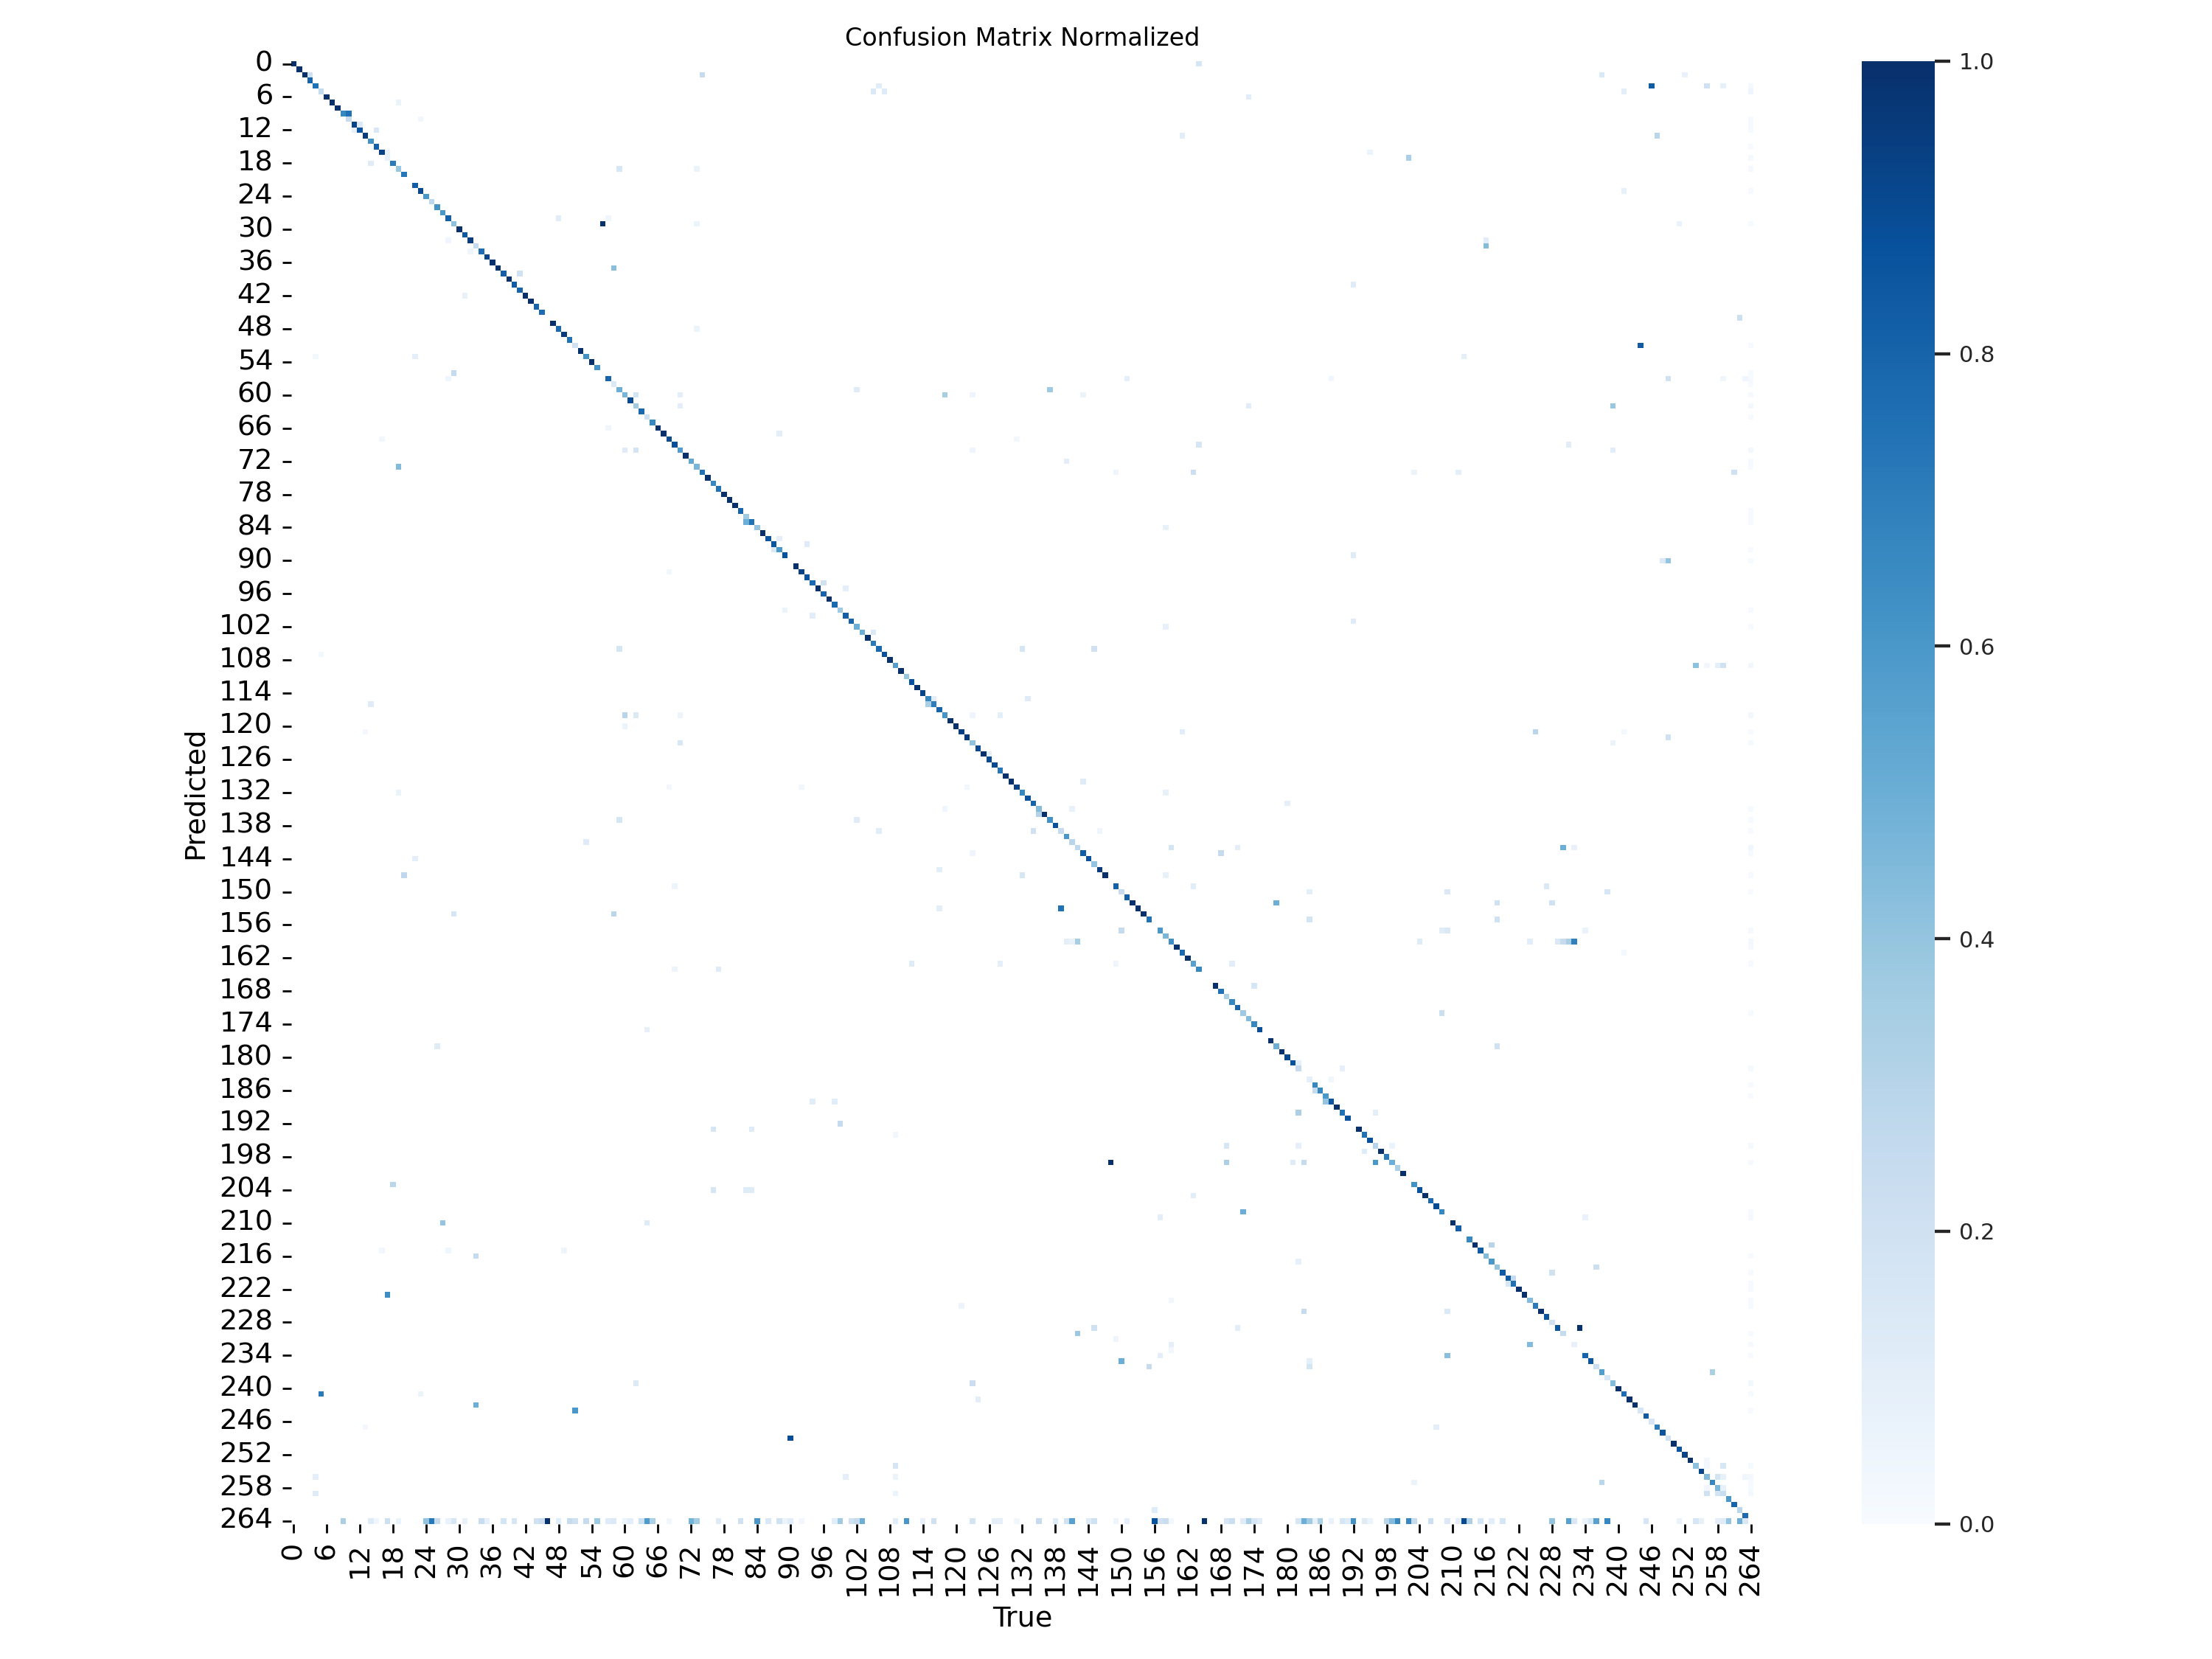